# 03 FDG exploration

In [1]:
# install required packages - commented out so it doesn't install every time
#%conda install -n Lauren openpyxl numpy pandas statsmodels plotnine matplotlib scikit-learn scipy mizani nbconvert pandoc pyreadstat kmodes seaborn

# import required packages
import numpy as np;
import pandas as pd;
from sklearn import preprocessing 
import statsmodels as sm;
import statsmodels.formula.api as smf;
import plotnine as p9;
import itertools
import pickle


# read in and clean data

In [2]:
data_folder_loc = "//admsyn/Primary/ADM/CustomerStudies/Rockefeller/Riluzole_Biomarkers/"
code_folder_loc = "//admsyn/homes/@DH-ADMDX/0/lauren.koenig-1606/code/Riluzole FDG/"

In [3]:
# read in data
composite_rr, pons_rr, para_rr, new_para_rr, new_ras_rr = pd.read_pickle(code_folder_loc + '/output/01_newdata.pkl')

In [4]:
# orig has additional 
# 
# pons (1st) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'FRONTAL-gm', 'Avg_MedOrbFrontal', 'Avg PCC'
# para (1st) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'FRONTAL-gm', 'Avg_MedOrbFrontal'

# para (new) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'Avg PCC', 'Avg_MedOrbFrontal'
# para (new) also has 'SensMot-gm', 'Paracentral-gm', 'RASref1-gm'

# ras (new) is missing 'L_Hip', 'R_Hip', 'Avg_Hip', 'Temp', 'Avg_MedOrbFrontal'
# ras (new) also has 'SensMot-gm', 'Paracentral-gm', 'RASref1-gm', 'CO', 'Graycer-gm', 'Vermis-gm'

In [5]:
FDG_columns = ['Avg_MedOrbFrontal', 'Graycer_gm', 'Avg_PCC', 'Avg_Hip', 'MTL_gm', 'CO', 'Temp', 'SensMot_gm', 'L_Hip',
 'Vermis_gm', 'FRONTAL_gm', 'AC_gm', 'Precun_gm', 'Par_gm', 'RASref1_gm', 'Temp_gm', 'Paracentral_gm', 'R_Hip', 'PostCing_gm']

# define biomarker groups
plasma_columns = [ 'Ab40', 'Ab42', 'Ab42_40', 'GFAP','NFL',  'pTau181', 'pTau217',  'pTau231', 'pTau181_Ab42']
log10_plasma_columns = [s + '_log10' for s in plasma_columns]

cog_columns = ['MMSE', 'adascogtotal', 'bvrt', 'dstotal','tma','tmb',  'cowattotal', 'cdrtotal', 'cdrsum', 'adltotal', 'npitotal', 'gds']
vol_columns = ['VOL_Ventricles_Lz',
       'VOL_Ventricles_Rz', 'VOL_Putamen_Lz', 'VOL_Putamen_Rz',
       'VOL_ParaHip_Lz', 'VOL_ParaHip_Rz', 'VOL_Fusi_Lz', 'VOL_Fusi_Rz',
       'VOL_InfTemp_Lz', 'VOL_InfTemp_Rz', 'VOL_MidTemp_Lz', 'VOL_MidTemp_Rz',
       'VOL_SupTemp_Lz', 'VOL_SupTemp_Rz', 'VOL_Precun_Lz', 'VOL_Precun_Rz',
       'VOL_InfPar_Lz', 'VOL_InfPar_Rz', 'VOL_ParaPostCentr_Lz',
       'VOL_ParaPostCentr_Rz', 'VOL_SupraMarg_Lz', 'VOL_SupraMarg_Rz',
       'VOL_SupPar_Lz', 'VOL_SupPar_Rz', 'VOL_OrbitFront_Lz',
       'VOL_OrbitFront_Rz', 'VOL_Insula_Lz', 'VOL_Insula_Rz',
       'VOL_InfFront_Lz', 'VOL_InfFront_Rz', 'VOL_MidFront_Lz',
       'VOL_MidFront_Rz', 'VOL_SupFront_Lz', 'VOL_SupFront_Rz',
       'VOL_PrecFront_Lz', 'VOL_PrecFront_Rz', 'VOL_LatOcc_Lz',
       'VOL_LatOcc_Rz', 'VOL_Lingual_Lz', 'VOL_Lingual_Rz', 'VOL_Cuneus_Lz',
       'VOL_Cuneus_Rz', 'VOL_Pericalc_Lz', 'VOL_Pericalc_Rz',
       'VOL_AntCingulate_Lz', 'VOL_AntCingulate_Rz', 'VOL_PostCingulate_Lz',
       'VOL_PostCingulate_Rz', 'VOL_Entorhinal_Lz', 'VOL_Entorhinal_Rz',
       'VOL_Hip_Lz', 'VOL_Hip_Rz', 'VOL_TotalGrayz', 'VOL_TotalGray_Lz',
       'VOL_TotalGray_Rz', 'VOL_LatTemp_Lz', 'VOL_LatTemp_Rz',
       'VOL_Parietal_Lz', 'VOL_Parietal_Rz', 'VOL_Frontal_Lz',
       'VOL_Frontal_Rz', 'VOL_InfMidTemp_Lz', 'VOL_InfMidTemp_Rz',
       'VOL_InfInsFrontal_Lz', 'VOL_InfInsFrontal_Rz', 'VOL_MidSupFrontal_Lz',
       'VOL_MidSupFrontal_Rz', 'VOL_Inf_Mid_Fus_Temp_Lz',
       'VOL_Inf_Mid_Fus_Temp_Rz', 'VOL_Precun_InfPar_Lz',
       'VOL_Precun_InfPar_Rz', 'VOL_Precun_InfPar_Supramarg_Lz',
       'VOL_Precun_InfPar_Supramarg_Rz', 'VOL_LatOccLingCun_Lz',
       'VOL_LatOccLingCun_Rz', 'VOL_InfParSupra_Lz', 'VOL_InfParSupra_Rz']



# Model changes over time in trial

## orig rr : only dataset with longitudinal FDG

c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Avg_MedOrbFrontal 0.01
              Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Avg_MedOrbFrontal
No. Observations:   82      Method:             REML             
No. Groups:         41      Scale:              0.0008           
Min. group size:    2       Log-Likelihood:     117.5237         
Max. group size:    2       Converged:          Yes              
Mean group size:    2.0                                          
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -0.018    0.014 -1.291 0.197 -0.047  0.010
timepoint[T.end]       -0.019    0.009 -2.042 0.041 -0.036 -0.001
Group                   0.033    0.020  1.650 0.099 -0.006  0.072
Group:timepoint[T.end]  0.033    0.013  2.608 0.009  0.008  0.058
Group Var               0.003    0.041                          

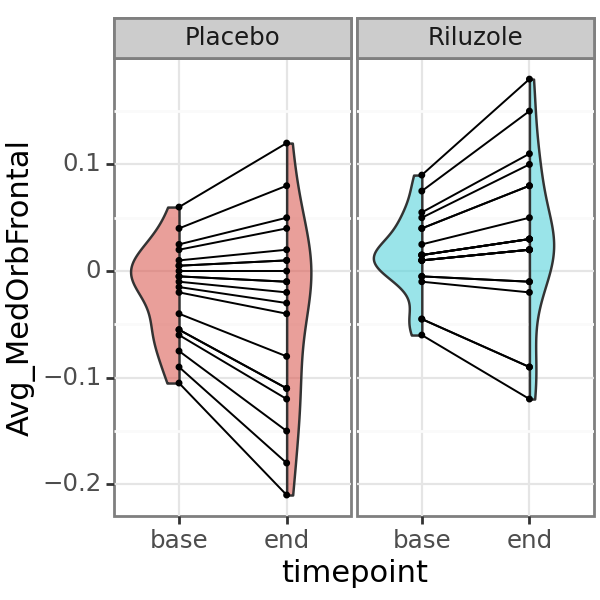




 Avg_PCC 0.01
              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Avg_PCC
No. Observations:     82          Method:                 REML   
No. Groups:           41          Scale:                  0.0008 
Min. group size:      2           Log-Likelihood:         96.7211
Max. group size:      2           Converged:              Yes    
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.923    0.024 37.666 0.000  0.875  0.971
timepoint[T.end]       -0.041    0.009 -4.707 0.000 -0.058 -0.024
Group                  -0.008    0.034 -0.237 0.812 -0.075  0.059
Group:timepoint[T.end]  0.032    0.012  2.621 0.009  0.008  0.056
Group Var               0.011    0.135                           
 



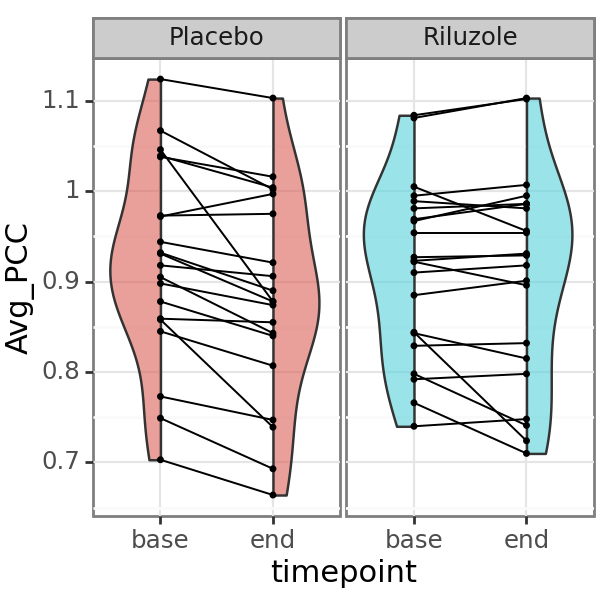

c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Avg_Hip 0.09


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 MTL_gm 0.1


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Temp 0.01
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Temp    
No. Observations:      82         Method:                REML    
No. Groups:            41         Scale:                 0.0005  
Min. group size:       2          Log-Likelihood:        117.0506
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.737    0.018 40.342 0.000  0.701  0.773
timepoint[T.end]       -0.022    0.007 -3.236 0.001 -0.036 -0.009
Group                  -0.001    0.026 -0.041 0.967 -0.051  0.049
Group:timepoint[T.end]  0.024    0.010  2.512 0.012  0.005  0.043
Group Var               0.006    0.094                           
 



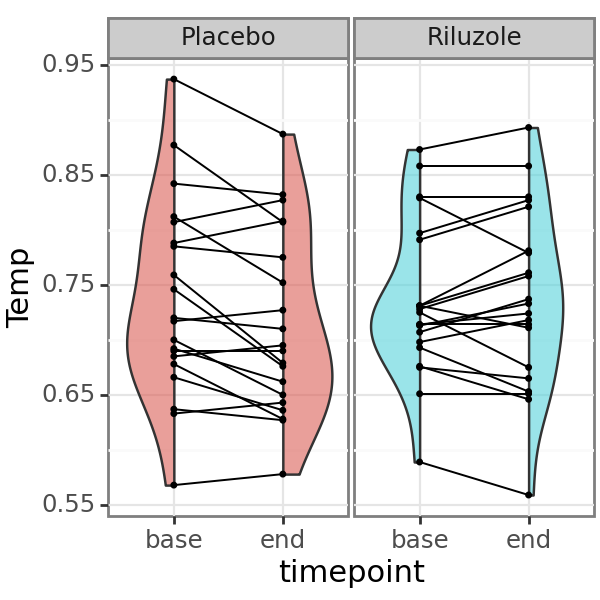

c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 L_Hip 0.37


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 FRONTAL_gm 0.02
              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    FRONTAL_gm
No. Observations:    82         Method:                REML      
No. Groups:          41         Scale:                 0.0021    
Min. group size:     2          Log-Likelihood:        96.9951   
Max. group size:     2          Converged:             Yes       
Mean group size:     2.0                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.983    0.016 61.307 0.000  0.951  1.014
timepoint[T.end]       -0.130    0.015 -8.912 0.000 -0.159 -0.102
Group                  -0.029    0.022 -1.301 0.193 -0.073  0.015
Group:timepoint[T.end]  0.046    0.020  2.251 0.024  0.006  0.086
Group Var               0.003    0.028                           
 



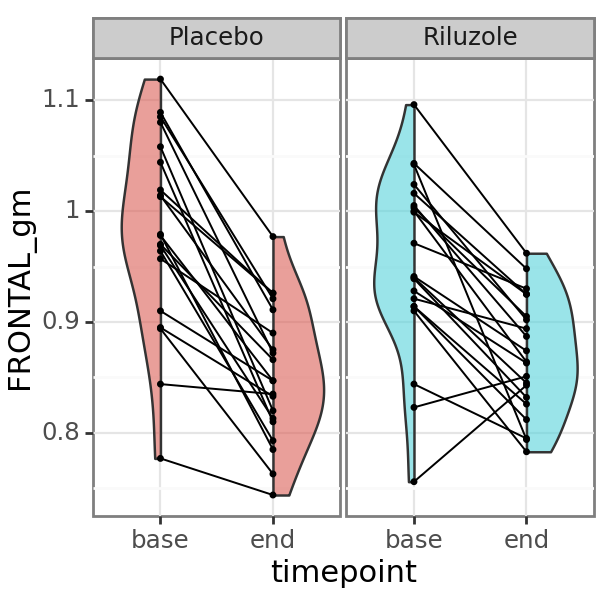

c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 AC_gm 0.05
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    AC_gm   
No. Observations:      82         Method:                REML    
No. Groups:            41         Scale:                 0.0006  
Min. group size:       2          Log-Likelihood:        112.0917
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.812    0.018 44.105 0.000  0.776  0.848
timepoint[T.end]       -0.015    0.008 -1.968 0.049 -0.031 -0.000
Group                  -0.019    0.026 -0.744 0.457 -0.070  0.031
Group:timepoint[T.end]  0.022    0.011  1.971 0.049  0.000  0.043
Group Var               0.006    0.083                           
 



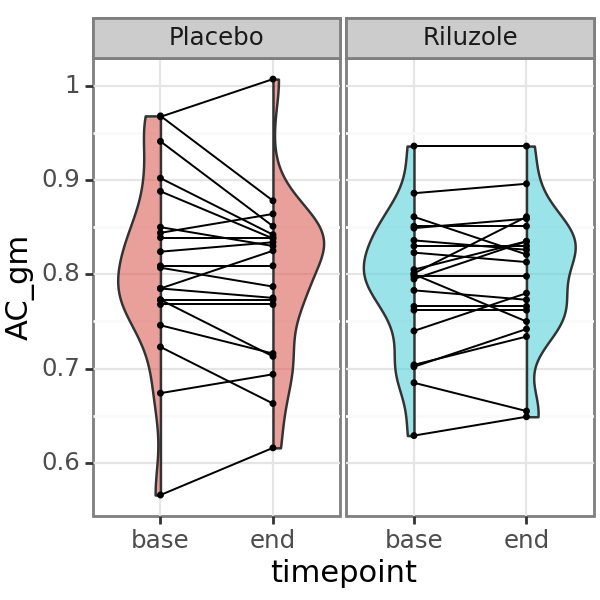

c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Precun_gm 0.01
              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Precun_gm
No. Observations:     82         Method:                REML     
No. Groups:           41         Scale:                 0.0004   
Min. group size:      2          Log-Likelihood:        111.0328 
Max. group size:      2          Converged:             Yes      
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.921    0.023 40.486 0.000  0.876  0.965
timepoint[T.end]       -0.032    0.006 -5.028 0.000 -0.045 -0.020
Group                  -0.002    0.032 -0.050 0.960 -0.064  0.061
Group:timepoint[T.end]  0.023    0.009  2.549 0.011  0.005  0.041
Group Var               0.010    0.159                           
 



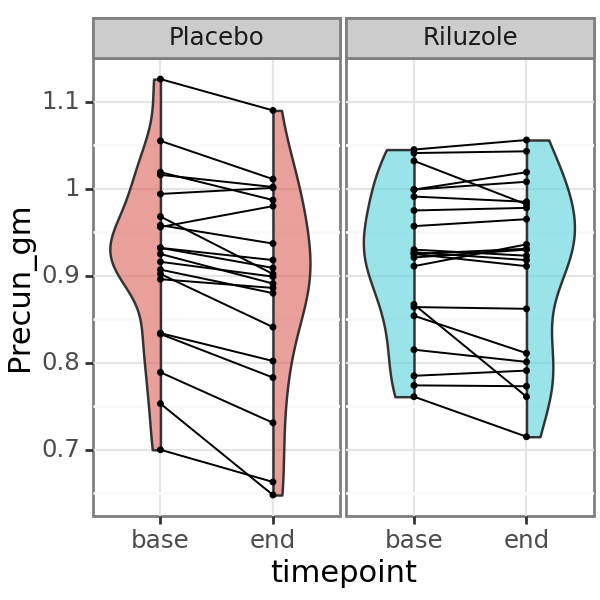




 Par_gm 0.12


c:\Users\Lauren.Koenig\.conda\envs\Lauren_export_conda_20250102\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.




 Temp_gm 0.01
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Temp_gm 
No. Observations:      82         Method:                REML    
No. Groups:            41         Scale:                 0.0005  
Min. group size:       2          Log-Likelihood:        113.0181
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.794    0.019 40.770 0.000  0.756  0.832
timepoint[T.end]       -0.023    0.007 -3.183 0.001 -0.037 -0.009
Group                  -0.009    0.027 -0.313 0.754 -0.062  0.045
Group:timepoint[T.end]  0.027    0.010  2.702 0.007  0.007  0.047
Group Var               0.007    0.103                           
 



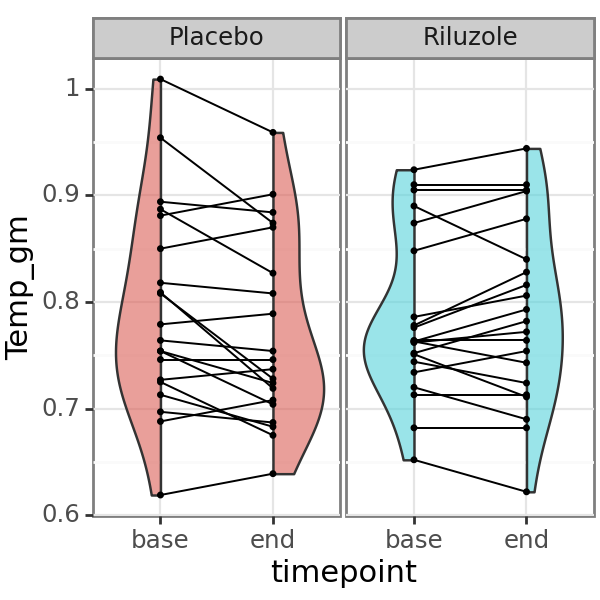




 R_Hip 0.02
              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    R_Hip   
No. Observations:      82         Method:                REML    
No. Groups:            41         Scale:                 0.0006  
Min. group size:       2          Log-Likelihood:        100.2707
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.589    0.026 22.568 0.000  0.538  0.640
timepoint[T.end]       -0.022    0.007 -2.966 0.003 -0.037 -0.007
Group                   0.013    0.036  0.367 0.714 -0.058  0.085
Group:timepoint[T.end]  0.024    0.010  2.343 0.019  0.004  0.045
Group Var               0.013    0.182                           
 



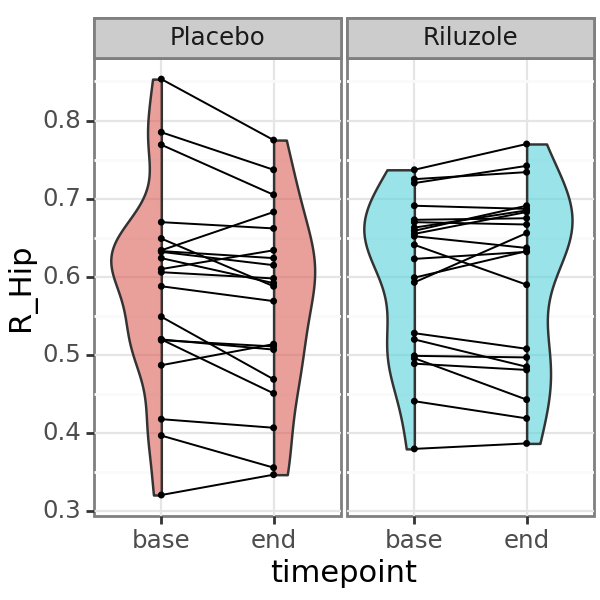




 PostCing_gm 0.0
              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   PostCing_gm
No. Observations:     82        Method:               REML       
No. Groups:           41        Scale:                0.0006     
Min. group size:      2         Log-Likelihood:       101.7525   
Max. group size:      2         Converged:            Yes        
Mean group size:      2.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.927    0.024 38.183 0.000  0.880  0.975
timepoint[T.end]       -0.050    0.008 -6.483 0.000 -0.065 -0.035
Group                   0.012    0.034  0.360 0.719 -0.054  0.079
Group:timepoint[T.end]  0.042    0.011  3.931 0.000  0.021  0.063
Group Var               0.011    0.151                           
 



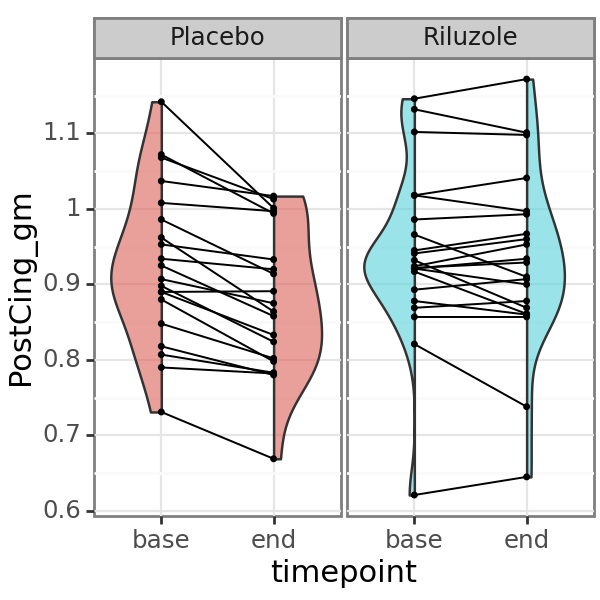

"# v2 of model - calculate change from baseline to followup and model the delta\n# gave almost identical pvalues, slightly less significant\n    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])].dropna(subset = [var, 'Group'])\n    ppts_with_multiple_visits = temp_df['ID_ADM'].value_counts()[temp_df['ID_ADM'].value_counts()>1].index\n    temp_df = temp_df[temp_df['ID_ADM'].isin(ppts_with_multiple_visits)]\n    temp_df = temp_df.sort_values(['ID_ADM', 'timepoint'])\n    temp_df = pd.merge(temp_df[['ID_ADM', 'Group']], temp_df.groupby(['ID_ADM'])[var].diff(), left_index=True, right_index=True).dropna()\n    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')\n    model2 = smf.logit(formula ='Group ~ ' + var, data = temp_df).fit(disp = 0);\n    model2_p = model2.pvalues[var].round(2).astype('str')\n    "

In [6]:
p9.options.figure_size = (3,3)

graphing_vars = ['Group']
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:


### v1 of model - use timepoint in a mixed model
    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole'])].dropna(subset = [var, 'Group'])
    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')
    model = smf.mixedlm(formula =var + '~ Group + timepoint + Group:timepoint', data = temp_df, groups = temp_df['ID_ADM']).fit(disp = 0);
    model_p = model.pvalues['Group:timepoint[T.end]'].round(2).astype('str')
    print('\n\n', var, model_p)
    if (model.pvalues['Group:timepoint[T.end]'] < 0.05):
        print(model.summary(),'\n')
        plot = (p9.ggplot(composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])], p9.aes(x = 'timepoint', y = var)) 
                + p9.theme_bw(base_size=11) 
                + p9.geom_violin(p9.aes(fill = graphing_vars[0]), alpha = 0.6, style="left-right") 
                + p9.geom_point(size = 0.4)
                + p9.geom_line(p9.aes(group="ID_ADM"), size = 0.4)                
                + p9.facet_grid('~' + graphing_vars[0])
                + p9.theme(legend_position = "none", axis_text_x = p9.element_text(rotation = 0), plot_title = p9.element_text(size = 10), plot_subtitle = p9.element_text(size = 8))
                )  
        print(plot)

'''# v2 of model - calculate change from baseline to followup and model the delta
# gave almost identical pvalues, slightly less significant
    temp_df = composite_rr[composite_rr['Group'].isin(['Placebo', 'Riluzole']) & composite_rr['timepoint'].isin(['base', 'end'])].dropna(subset = [var, 'Group'])
    ppts_with_multiple_visits = temp_df['ID_ADM'].value_counts()[temp_df['ID_ADM'].value_counts()>1].index
    temp_df = temp_df[temp_df['ID_ADM'].isin(ppts_with_multiple_visits)]
    temp_df = temp_df.sort_values(['ID_ADM', 'timepoint'])
    temp_df = pd.merge(temp_df[['ID_ADM', 'Group']], temp_df.groupby(['ID_ADM'])[var].diff(), left_index=True, right_index=True).dropna()
    temp_df['Group'] = temp_df['Group'].replace({'Placebo':'0', 'Riluzole':'1'}).astype('int')
    model2 = smf.logit(formula ='Group ~ ' + var, data = temp_df).fit(disp = 0);
    model2_p = model2.pvalues[var].round(2).astype('str')
    '''

# All data by age

## drop followup FDG data

In [7]:
composite_rr = composite_rr[composite_rr['timepoint'].isin(['base', 'not part of trial'])]
composite_rr

Subject_ID  L_Hip  R_Hip  Avg_Hip   Temp  Temp_gm  MTL_gm  PostCing_gm  \
0    APE-792-018  0.515  0.397    0.456  0.746    0.808   0.619        0.731   
1    APE-792-026  0.586  0.632    0.609  0.720    0.764   0.649        0.934   
2        RIL-001  0.658  0.588    0.623  0.666    0.713   0.686        0.818   
3        RIL-018  0.609  0.633    0.621  0.785    0.818   0.693        0.907   
4        RIL-019  0.566  0.418    0.492  0.637    0.697   0.538        0.848   
..           ...    ...    ...      ...    ...      ...     ...          ...   
254          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
255          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
256          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
257          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   
259          NaN    NaN    NaN      NaN    NaN      NaN     NaN          NaN   

     Precun_gm  Avg_PCC  ...  Aseg_vol_R_LATVENT  Aseg_vol_R_PALLIDUM  \
0        0.925    0.878  ...             49617.5               2552.9   
1        0.932    0.918  ...                 NaN                  NaN   
2        0.700    0.703  ...                 NaN                  NaN   
3        0.932    0.932  ...             30004.4               1557.7   
4        0.902    0.905  ...             23185.4               1029.6   
..         ...      ...  ...                 ...                  ...   
254        NaN      NaN  ...                 NaN                  NaN   
255        NaN      NaN  ...                 NaN                  NaN   
256        NaN      NaN  ...                 NaN                  NaN   
257        NaN      NaN  ...                 NaN                  NaN   
259        NaN      NaN  ...                 NaN                  NaN   

     Aseg_vol_R_PUTAMEN  Aseg_vol_R_THALAMUS Aseg_vol_R_VENTRALDC  \
0                2792.8               7919.0               4099.3   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                3916.6               5666.2               3268.6   
4                2849.0               4318.4               2754.3   
..                  ...                  ...                  ...   
254                 NaN                  NaN                  NaN   
255                 NaN                  NaN                  NaN   
256                 NaN                  NaN                  NaN   
257                 NaN                  NaN                  NaN   
259                 NaN                  NaN                  NaN   

    Aseg_vol_R_VESSEL  Aseg_vol_B_WM_HYPOINT                       source  \
0                 0.0                 8957.3  Riluzole Trial Participants   
1                 NaN                    NaN  Riluzole Trial Participants   
2                 NaN                    NaN  Riluzole Trial Participants   
3                56.7                 3992.2  Riluzole Trial Participants   
4                64.9                 7965.9  Riluzole Trial Participants   
..                ...                    ...                          ...   
254               NaN                    NaN                      Control   
255               NaN                    NaN                 Non-Trial AD   
256               NaN                    NaN                Non-Trial MCI   
257               NaN                    NaN                      Control   
259               NaN                    NaN  Riluzole Trial Participants   

                          Group2   Group3  
0    Riluzole Trial Participants  Placebo  
1    Riluzole Trial Participants  Placebo  
2    Riluzole Trial Participants  Placebo  
3    Riluzole Trial Participants  Placebo  
4    Riluzole Trial Participants  Placebo  
..                           ...      ...  
254                      Control      NaN  
255                      Control      NaN  
256               

## FDG - composite rr

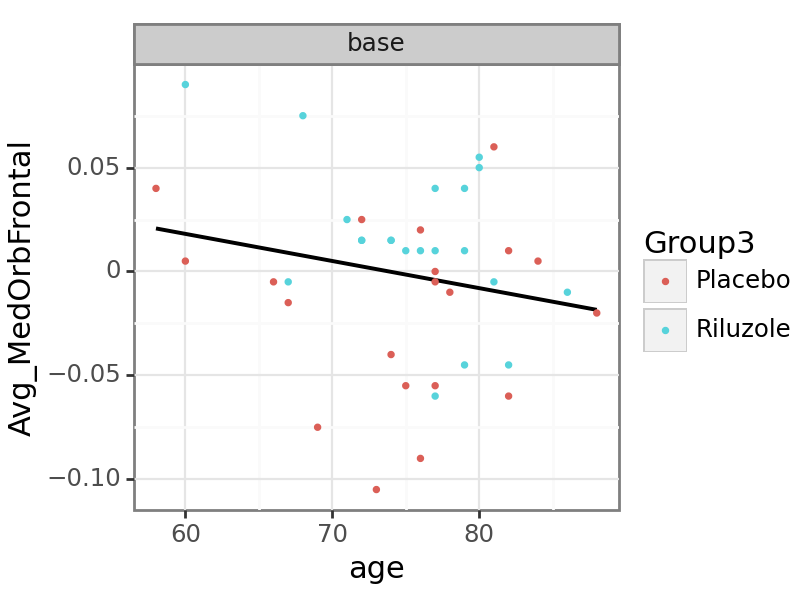

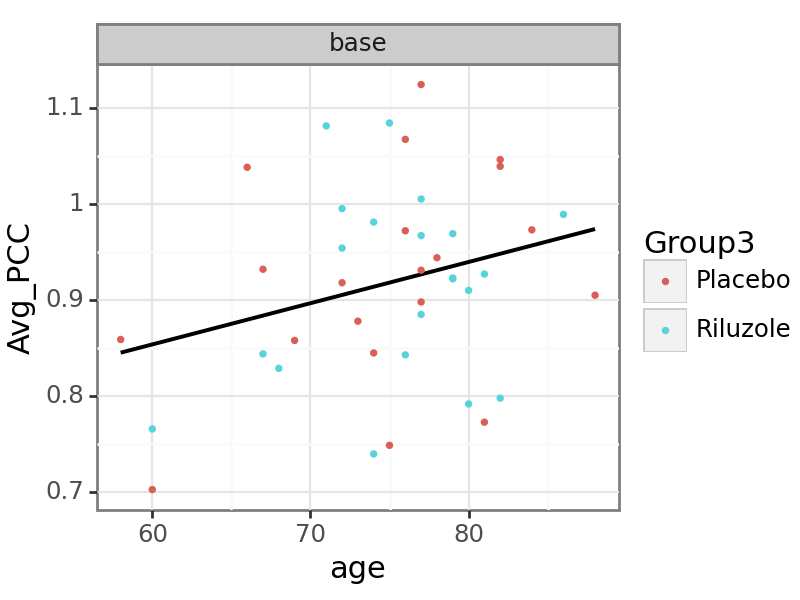

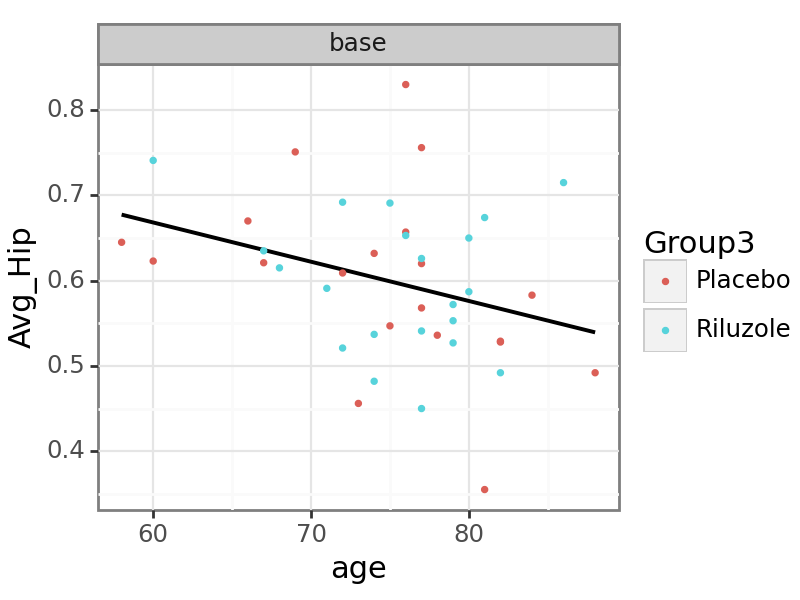

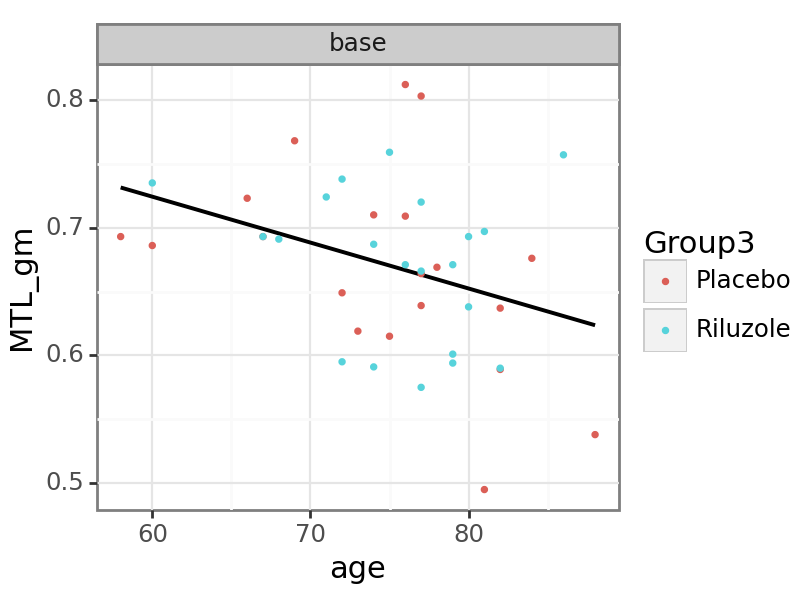

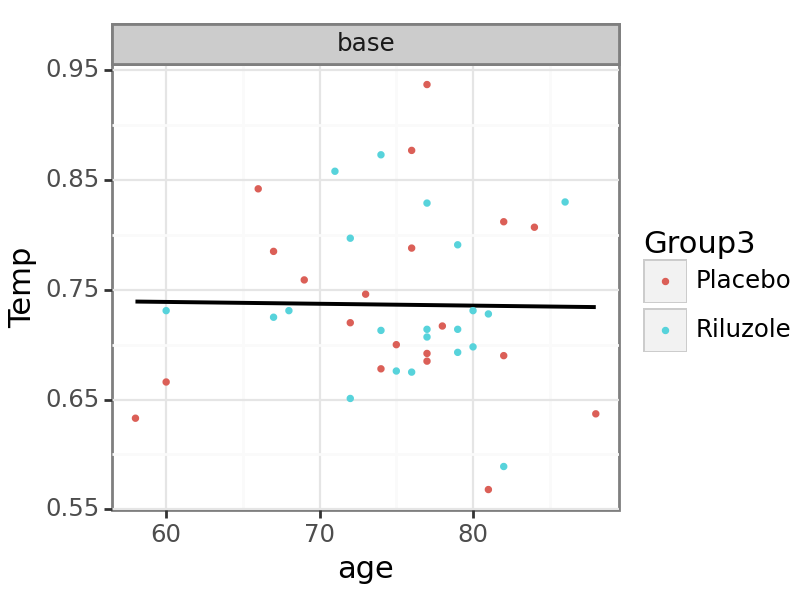

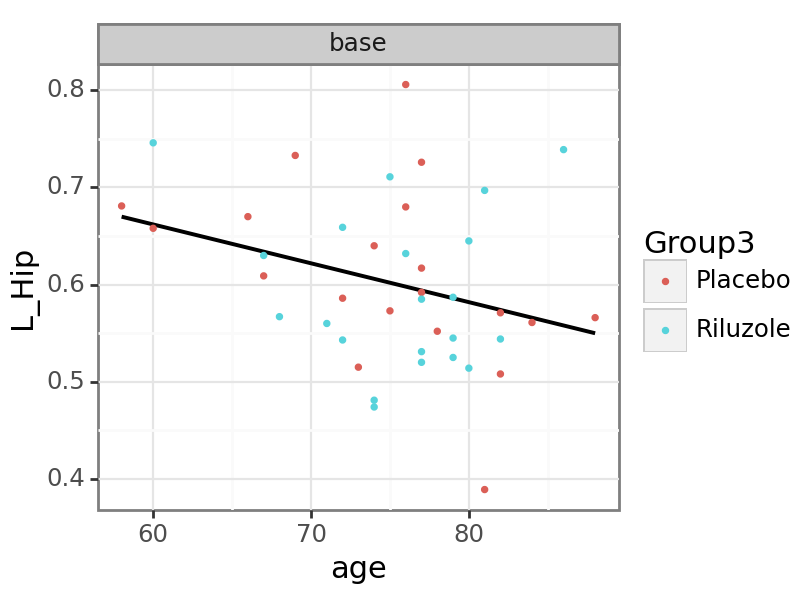

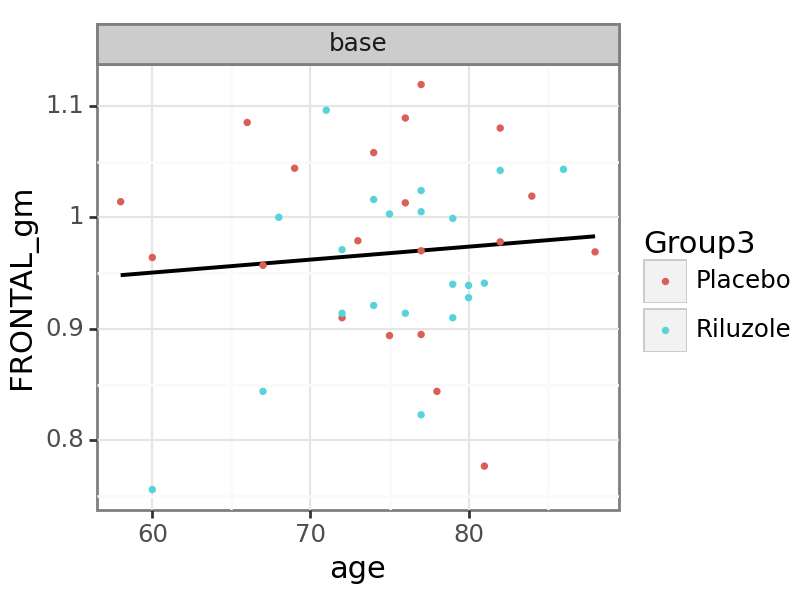

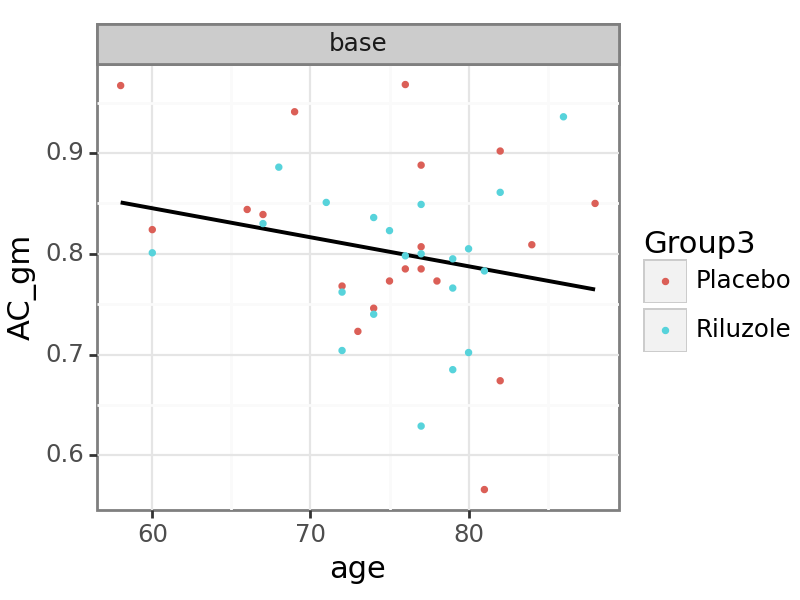

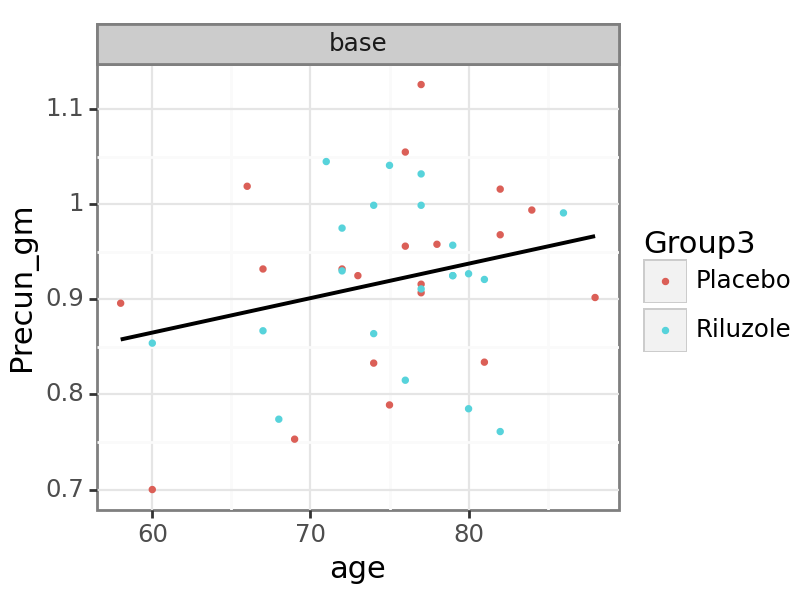

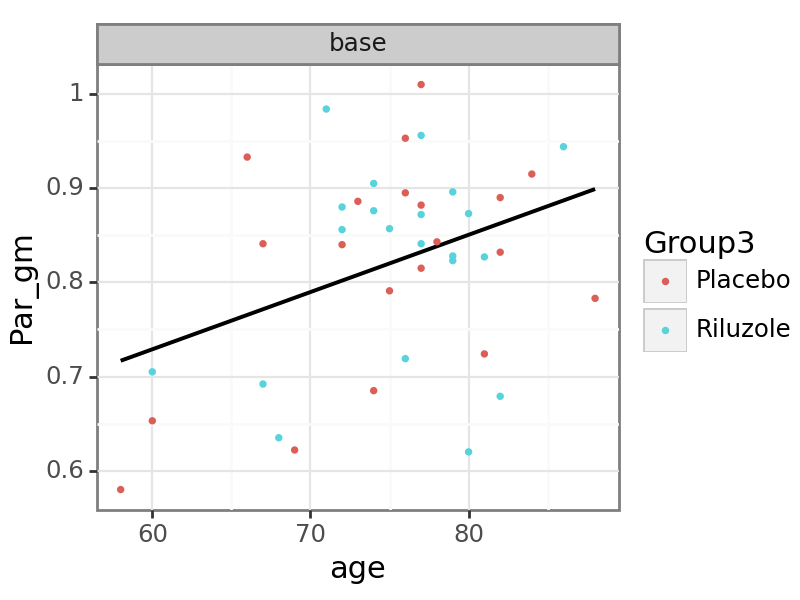

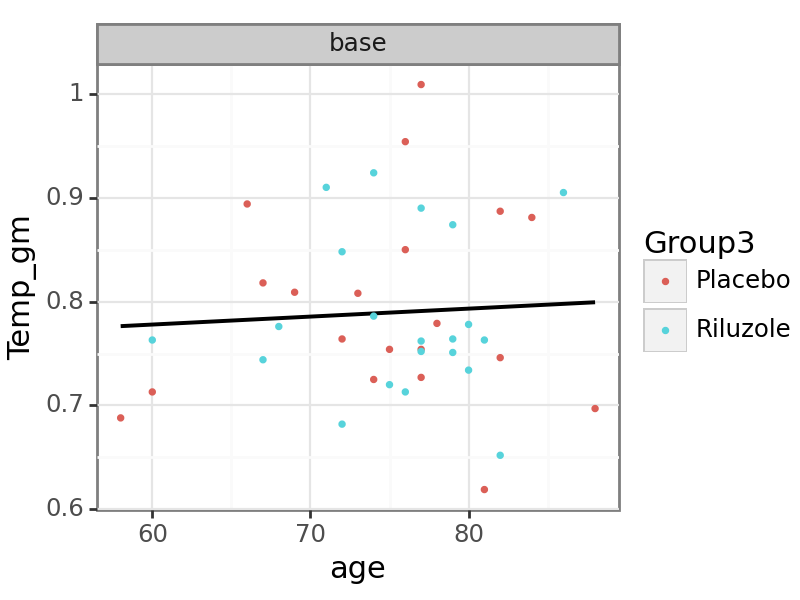

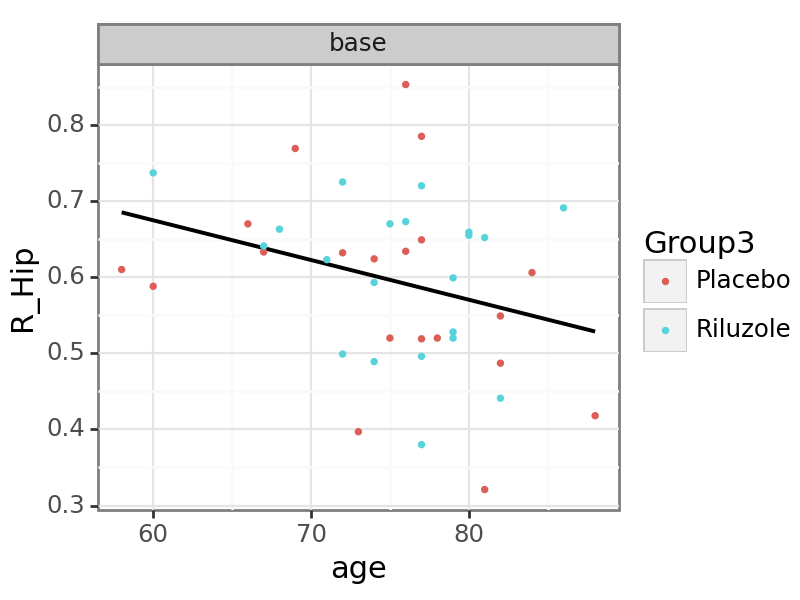

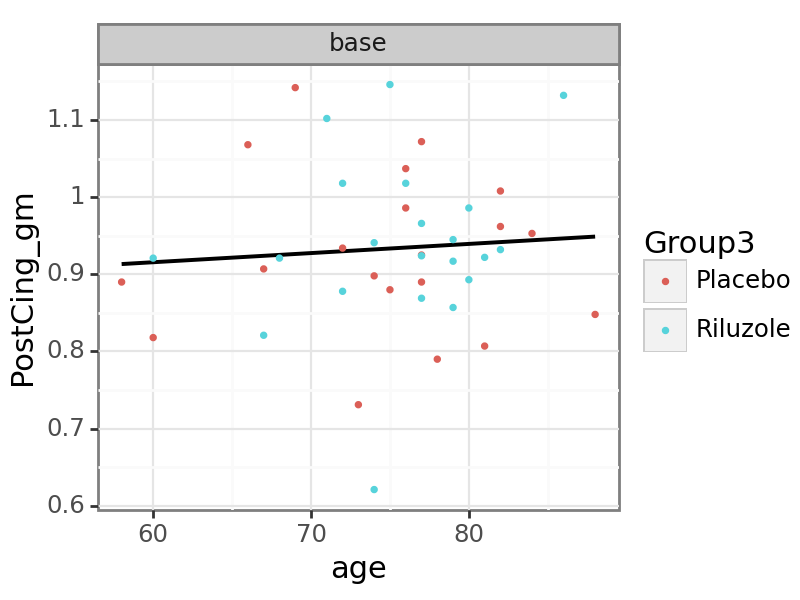

In [8]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:
    subset_data = composite_rr[composite_rr['timepoint'].isin(['base', 'not part of trial'])].dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## FDG - pons rr

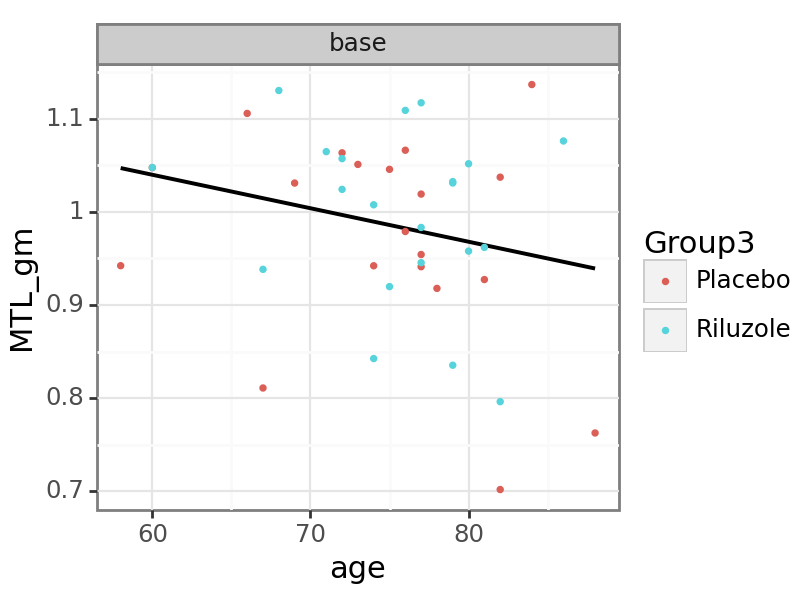

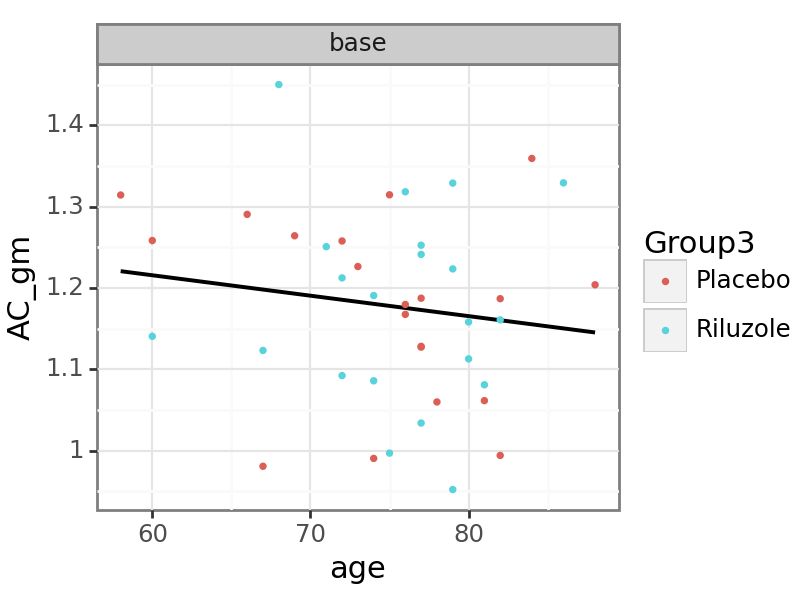

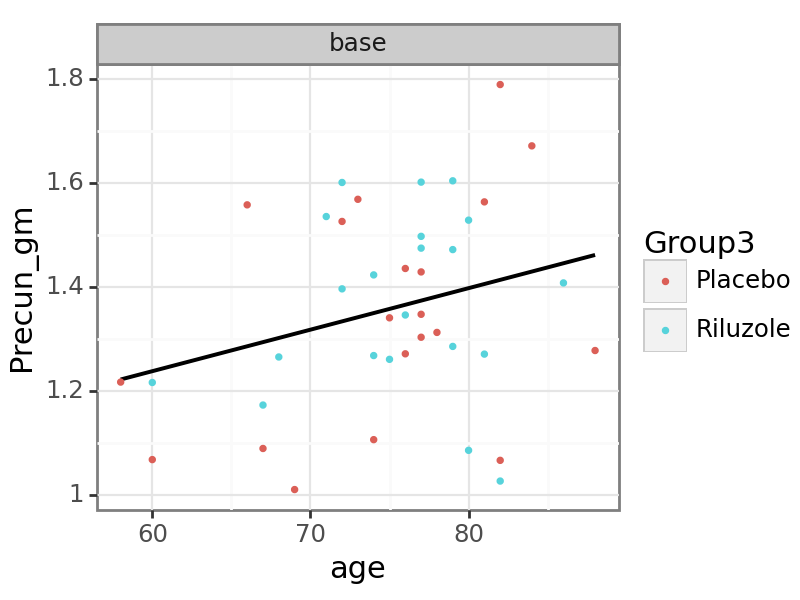

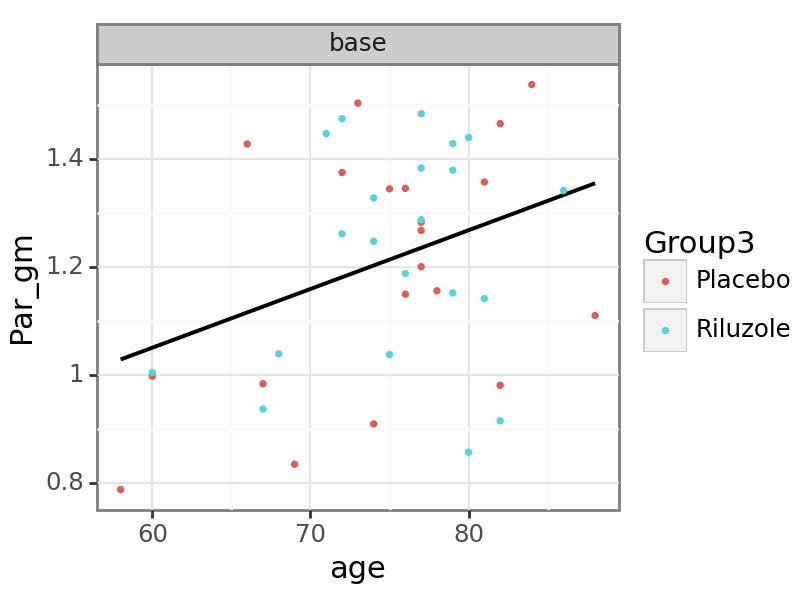

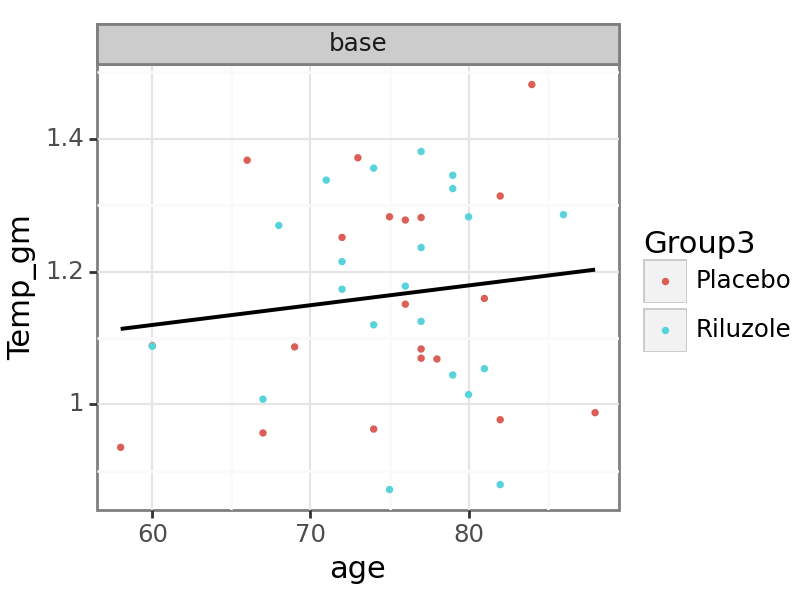

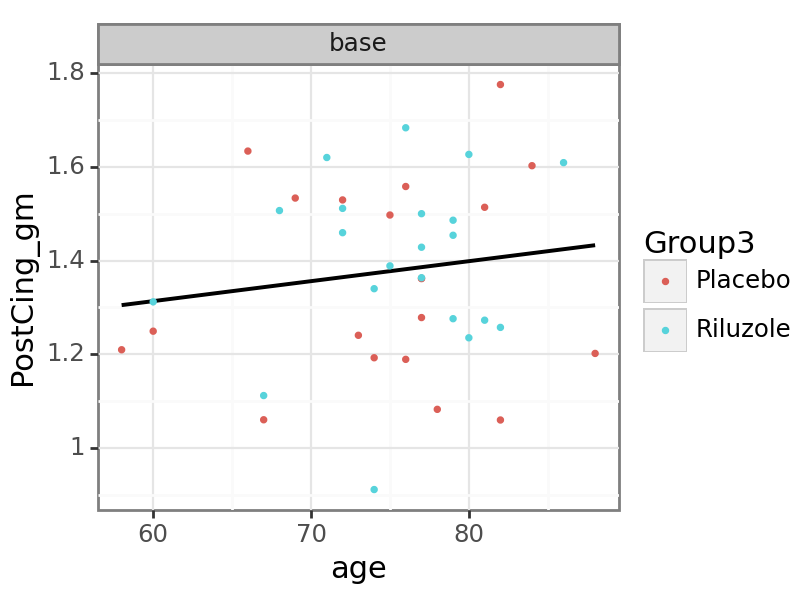

In [9]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in pons_rr.columns]:
    subset_data = pons_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## FDG - para2 rr

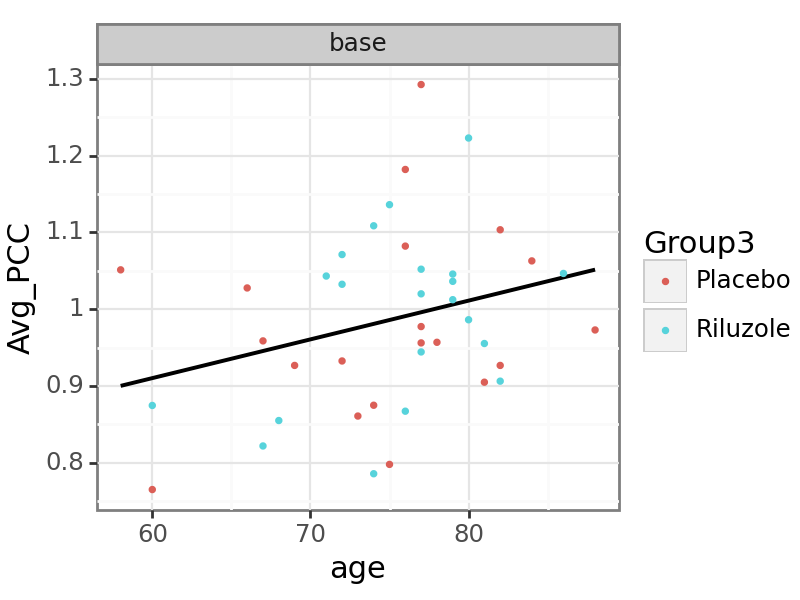

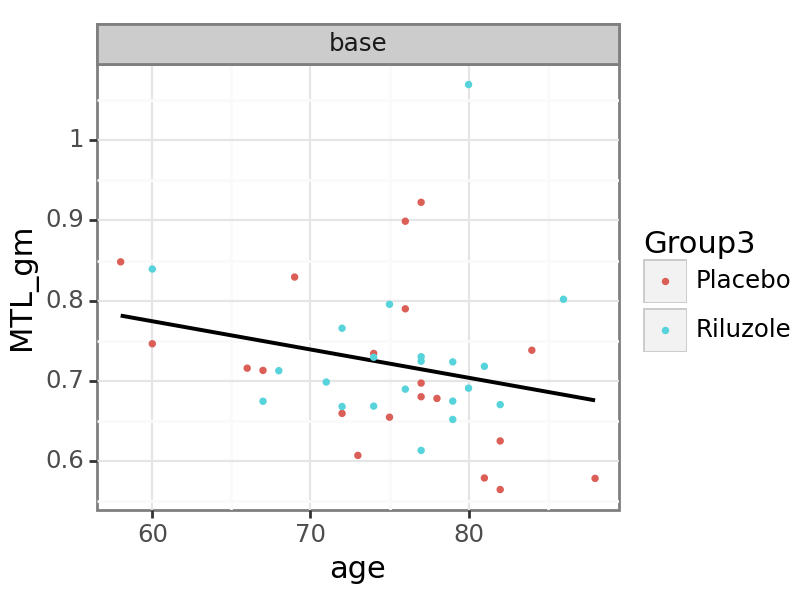

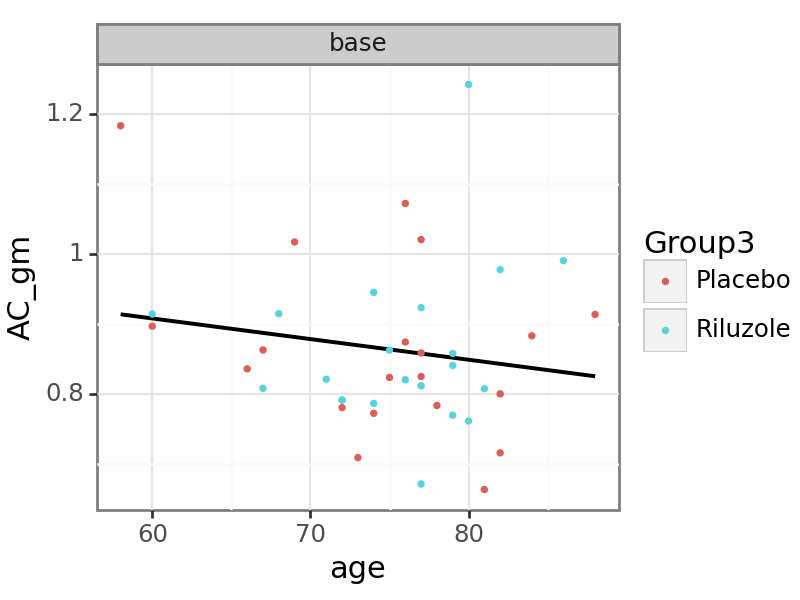

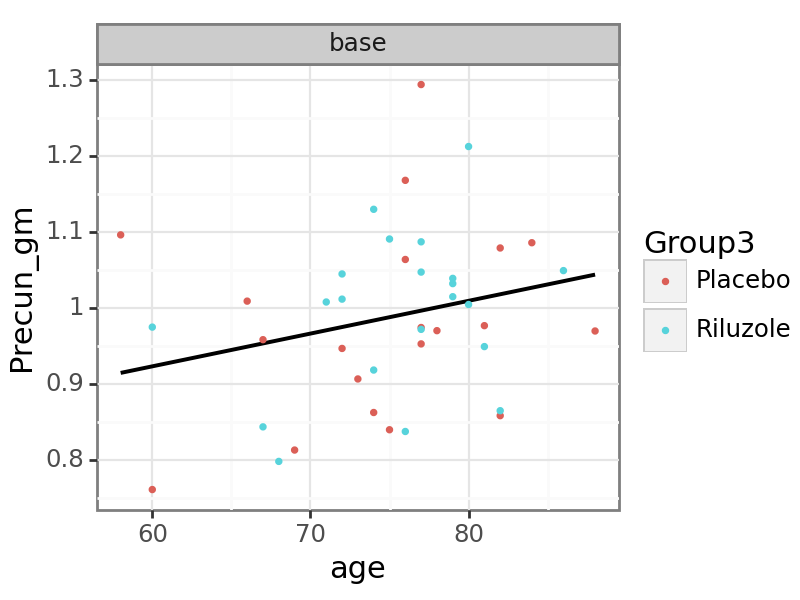

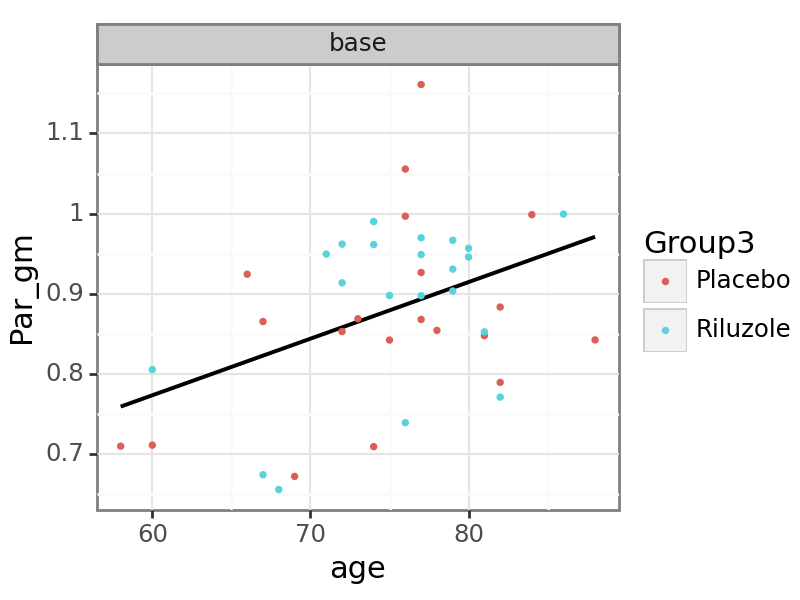

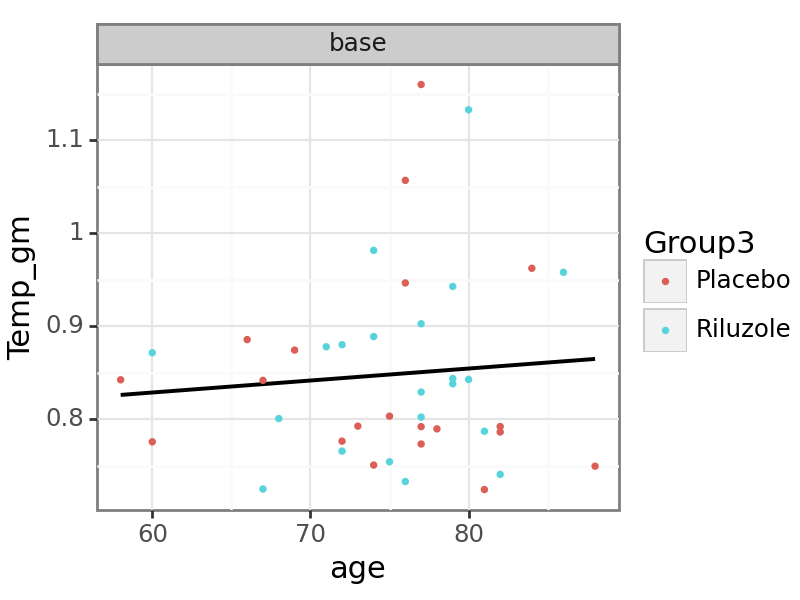

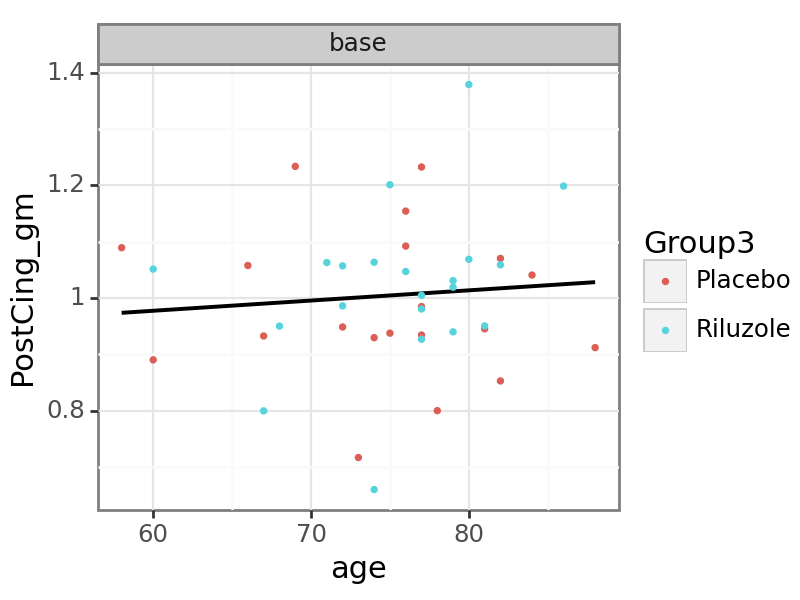

In [10]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in para_rr.columns]:
    subset_data = para_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## new_para_rr

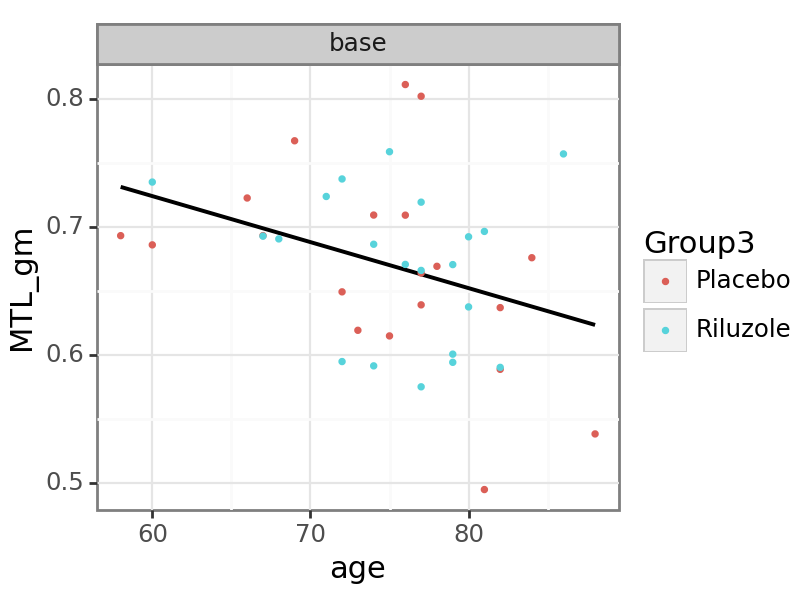

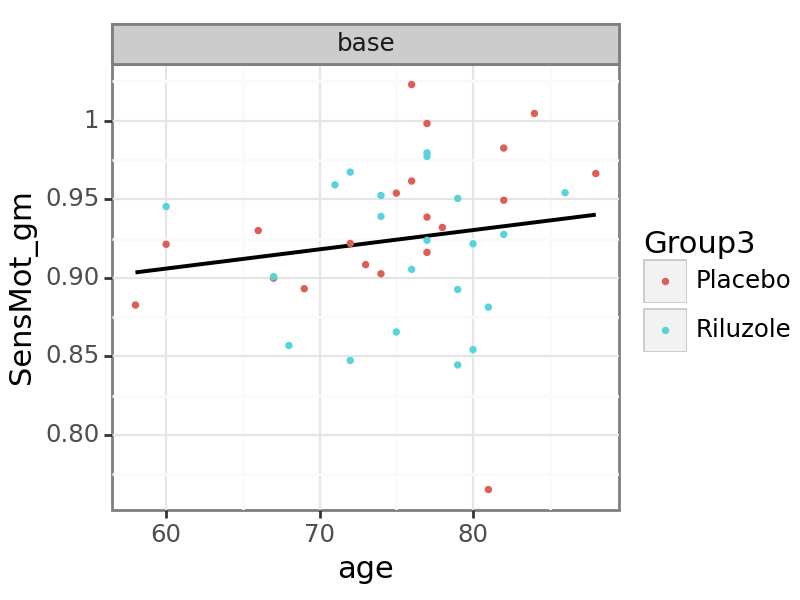

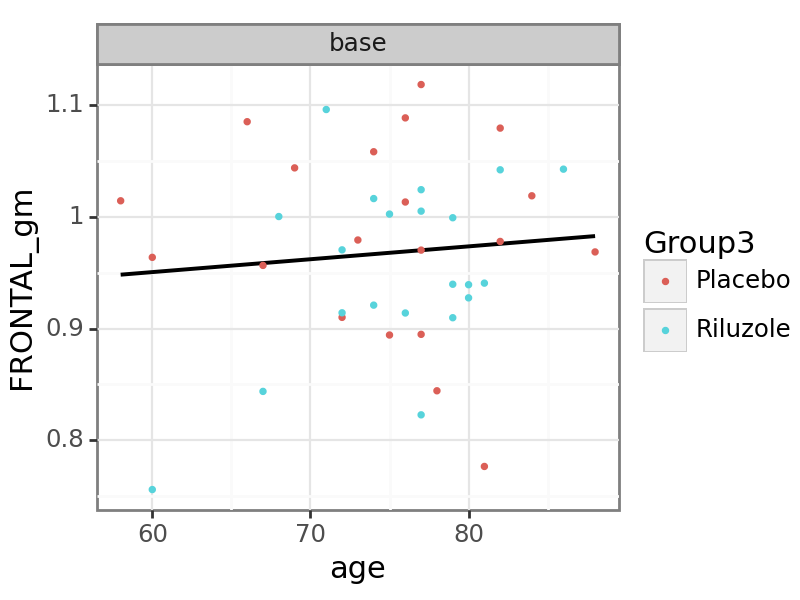

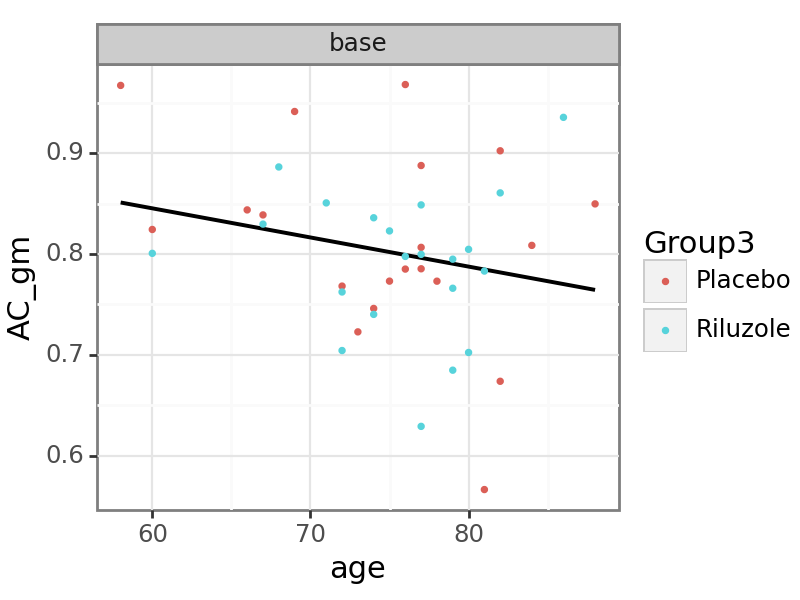

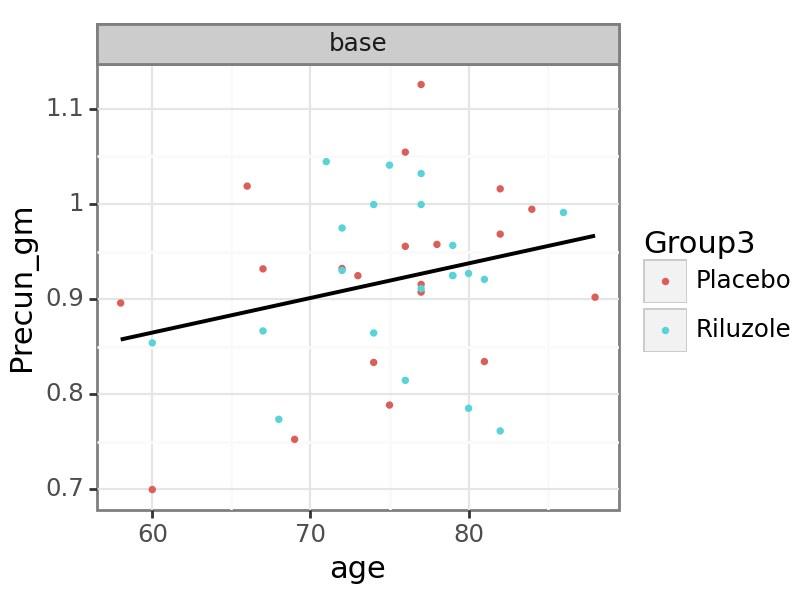

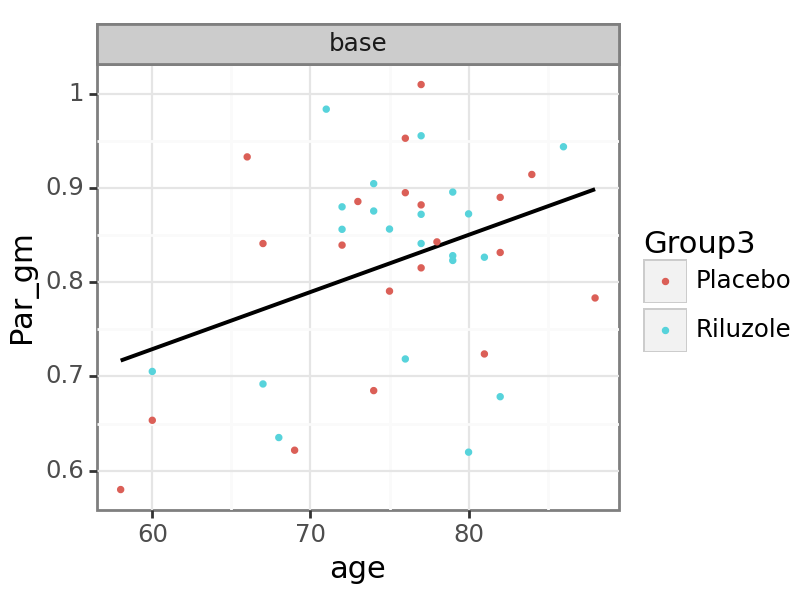

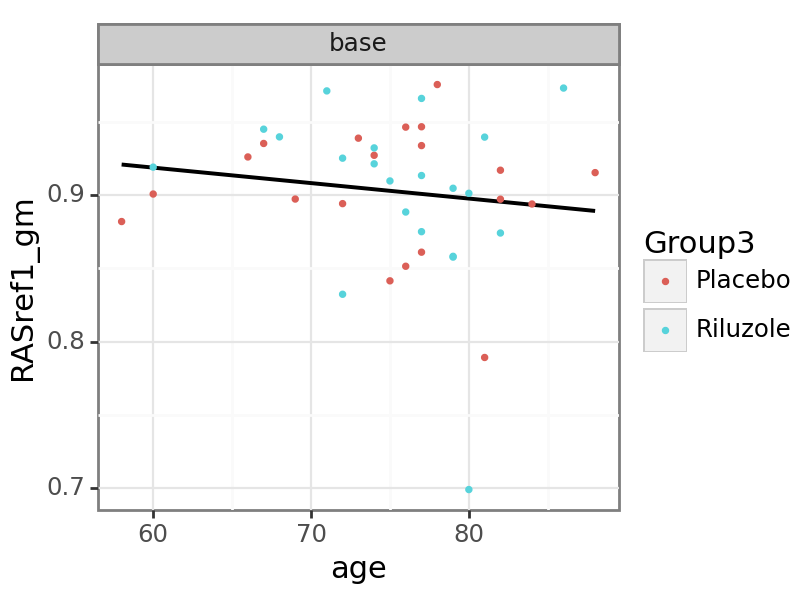

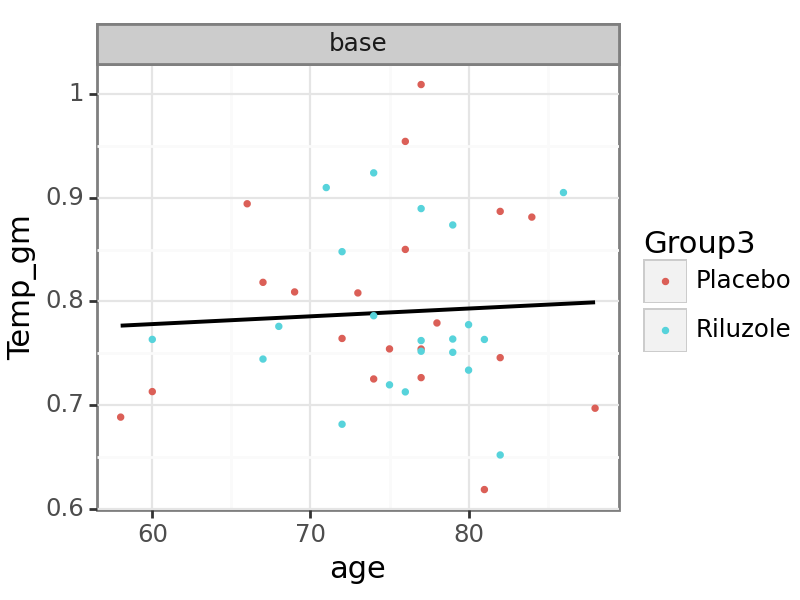

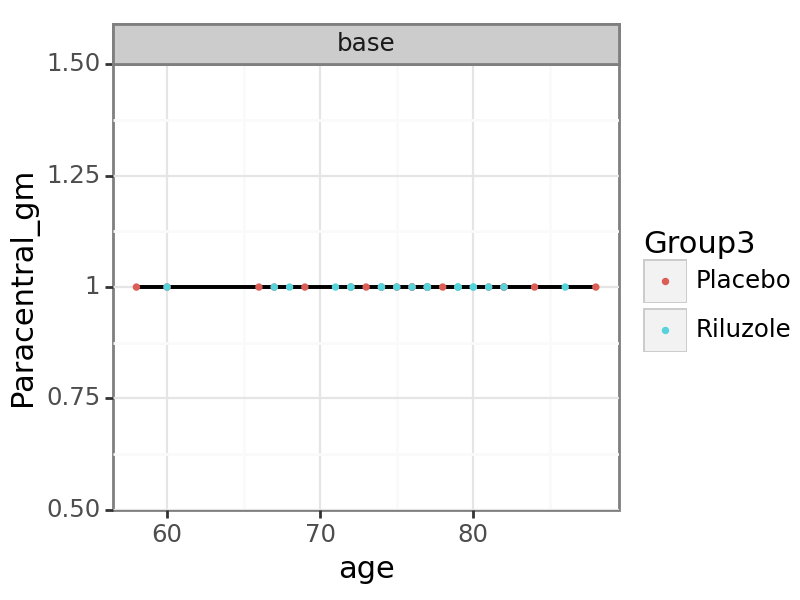

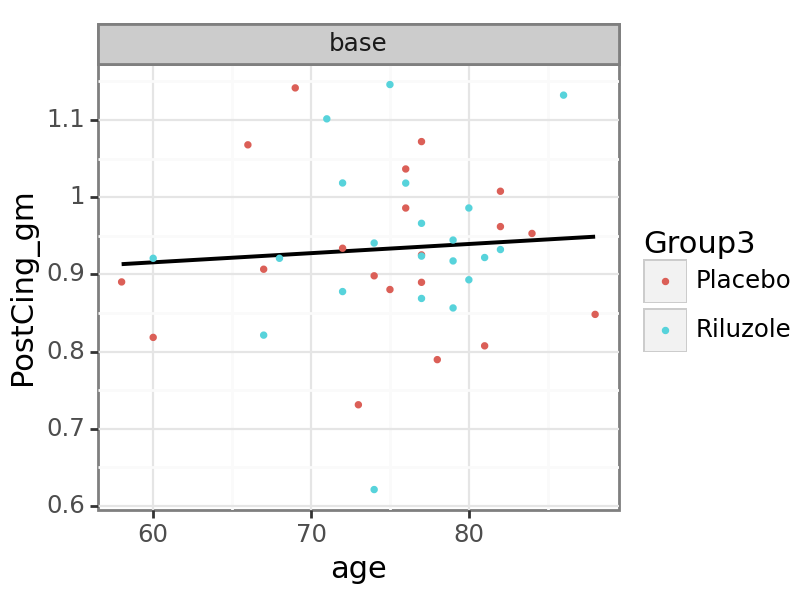

In [11]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in new_para_rr.columns]:
    subset_data = new_para_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

## new_ras_rr

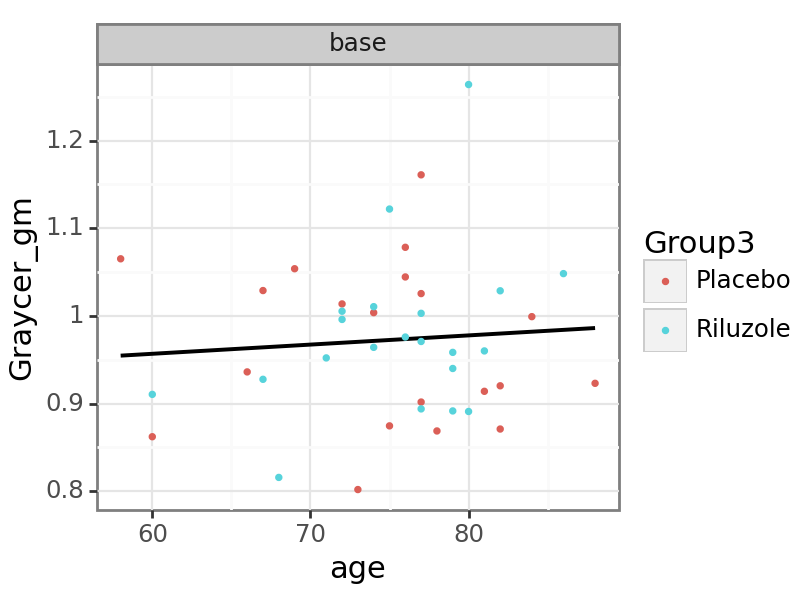

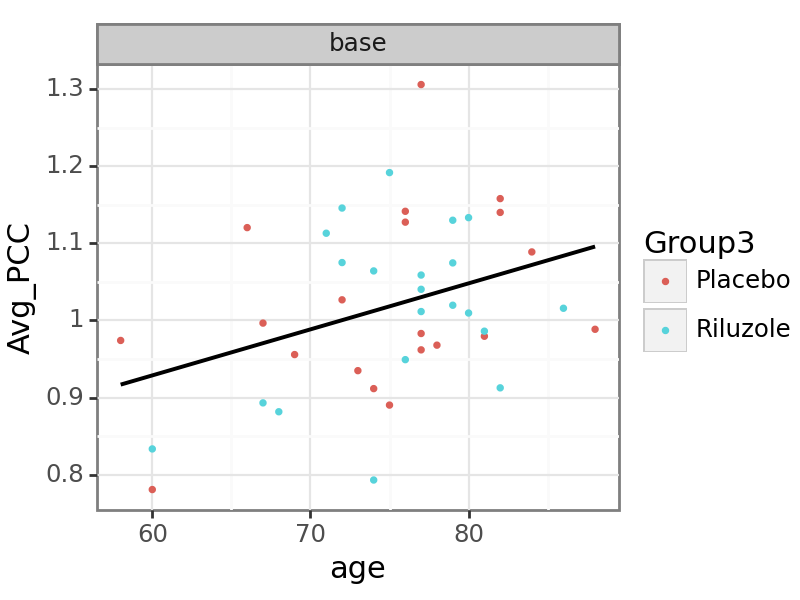

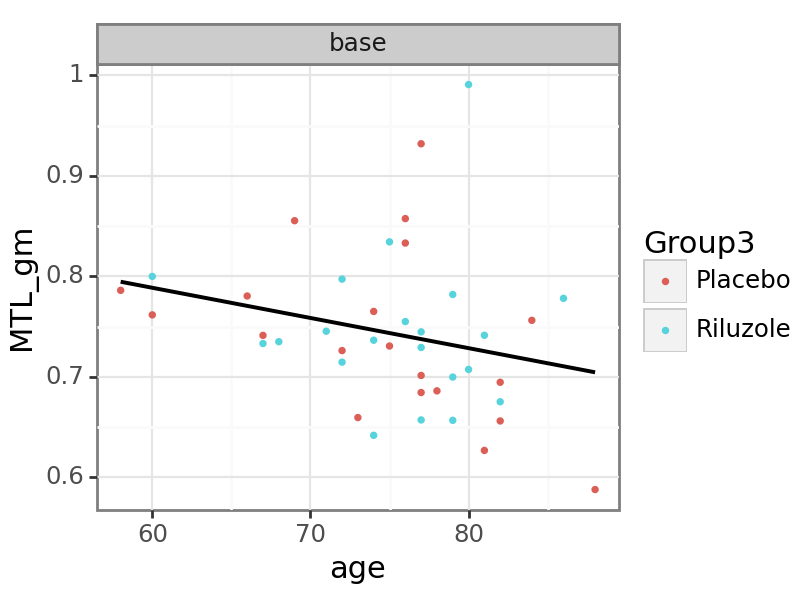

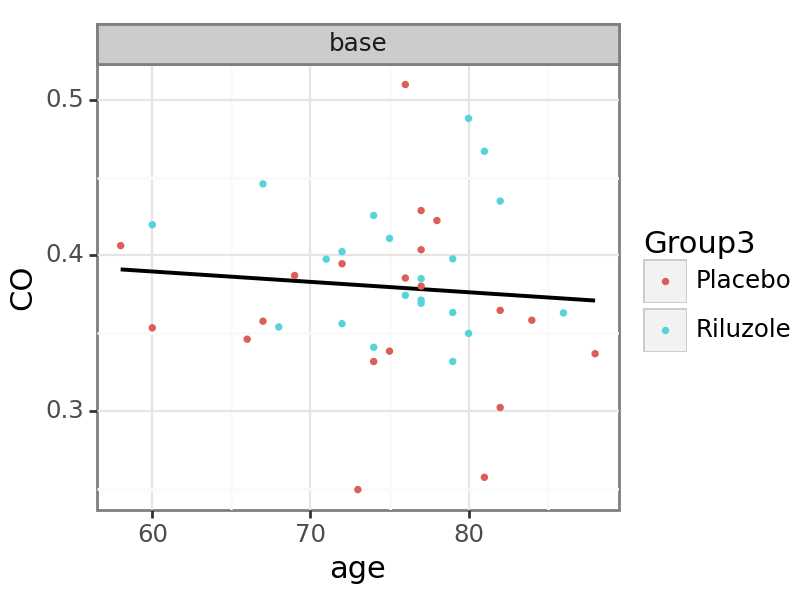

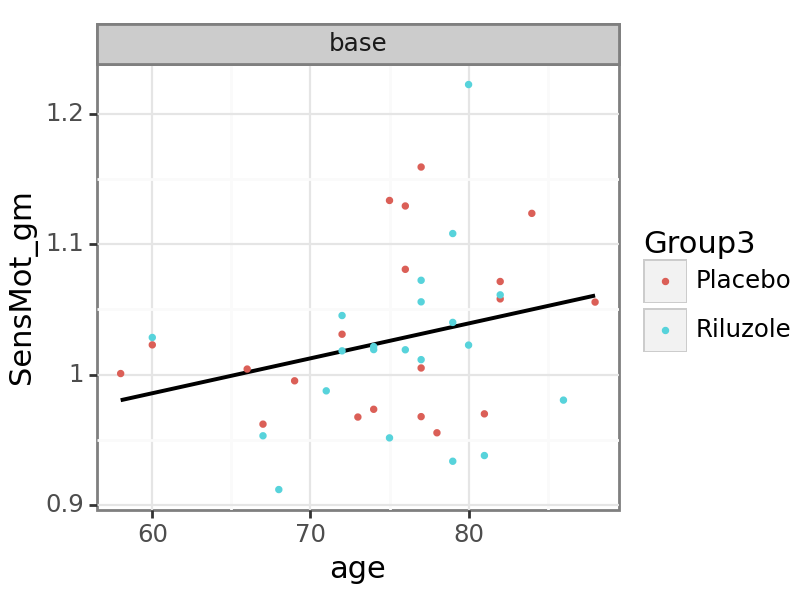

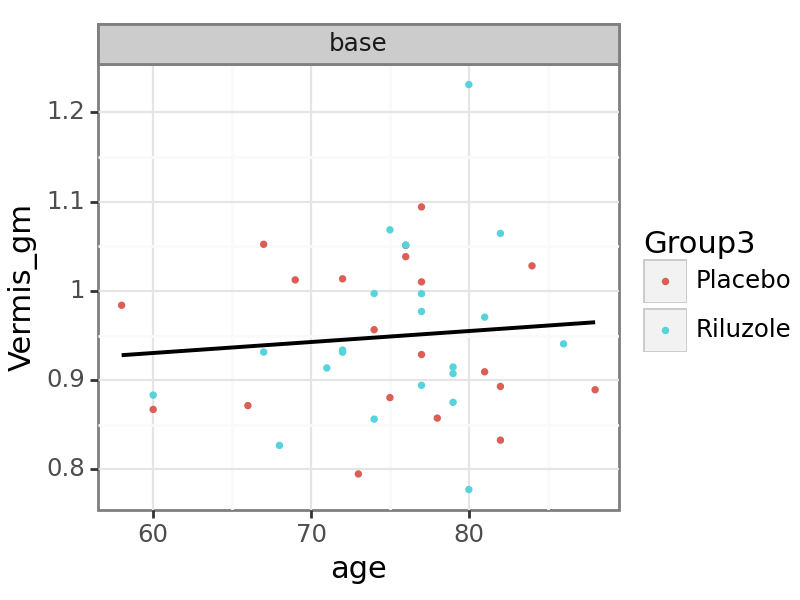

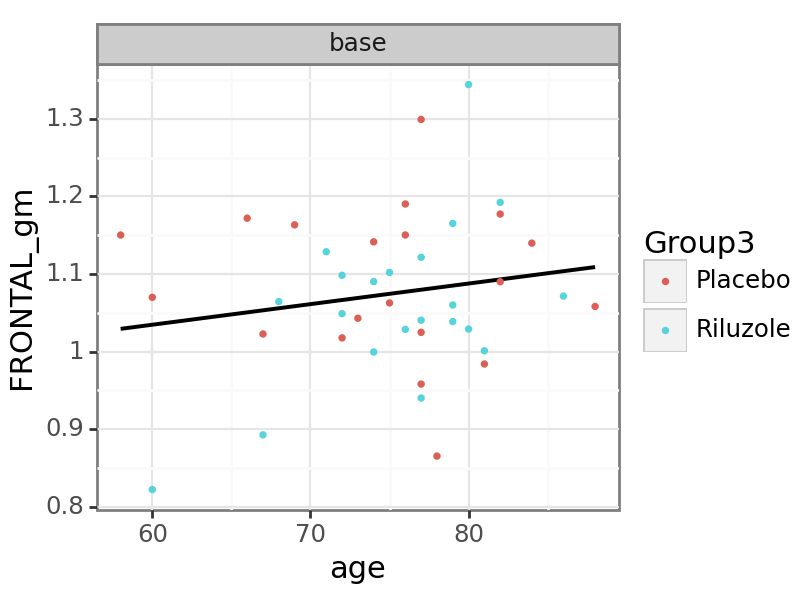

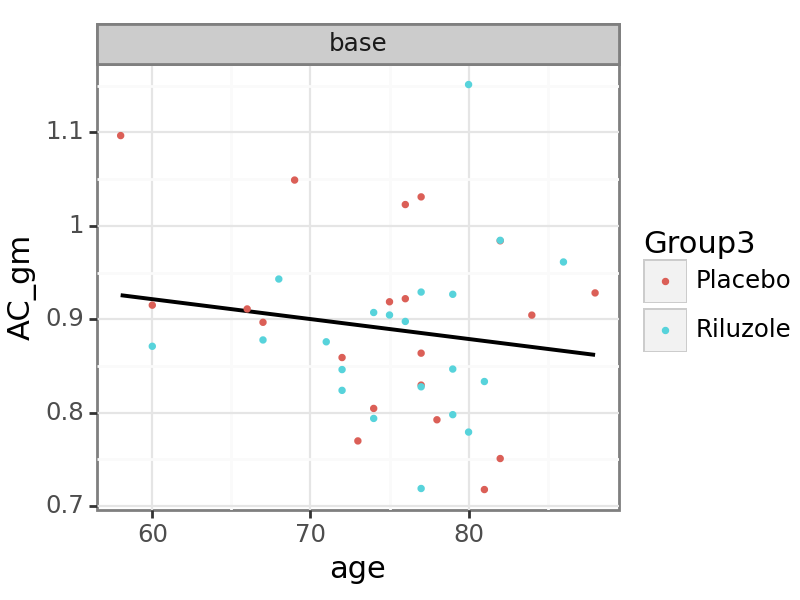

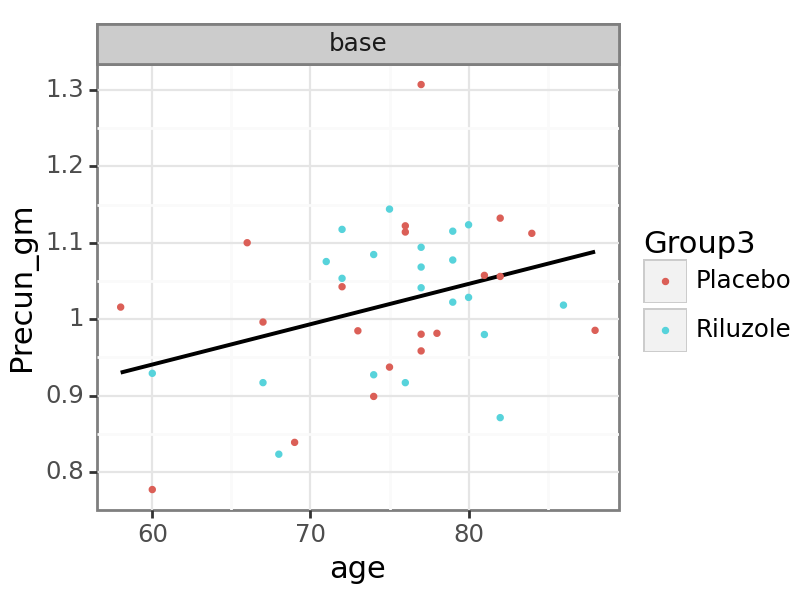

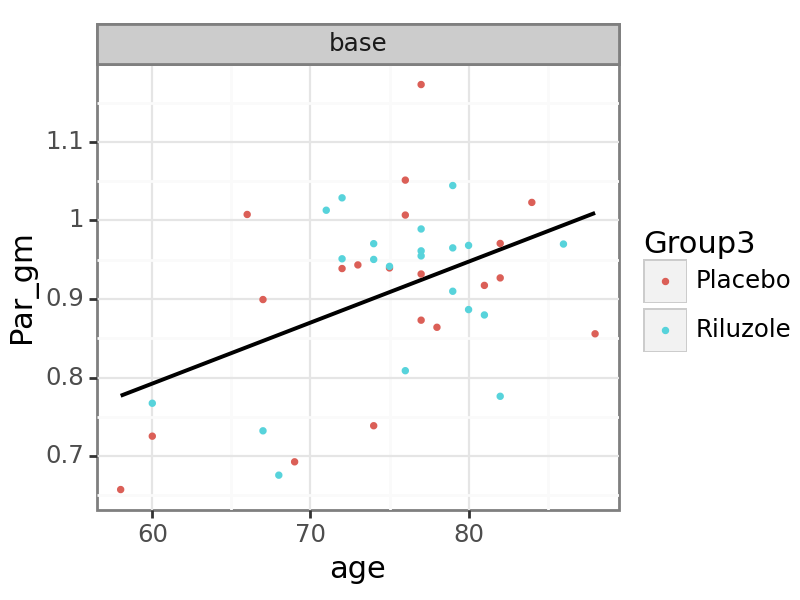

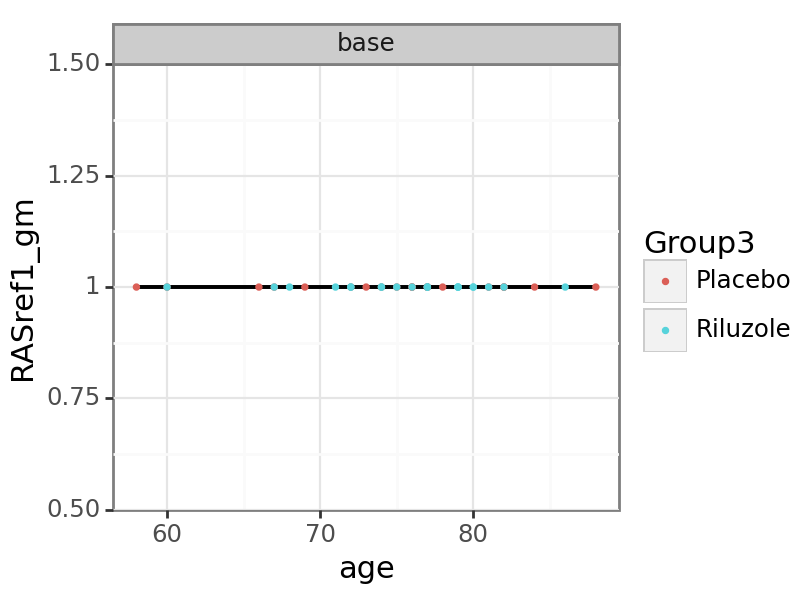

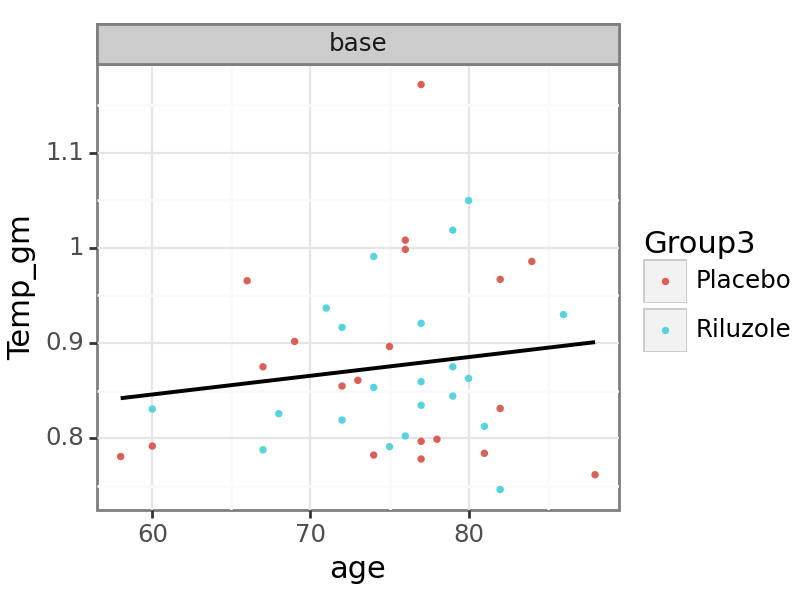

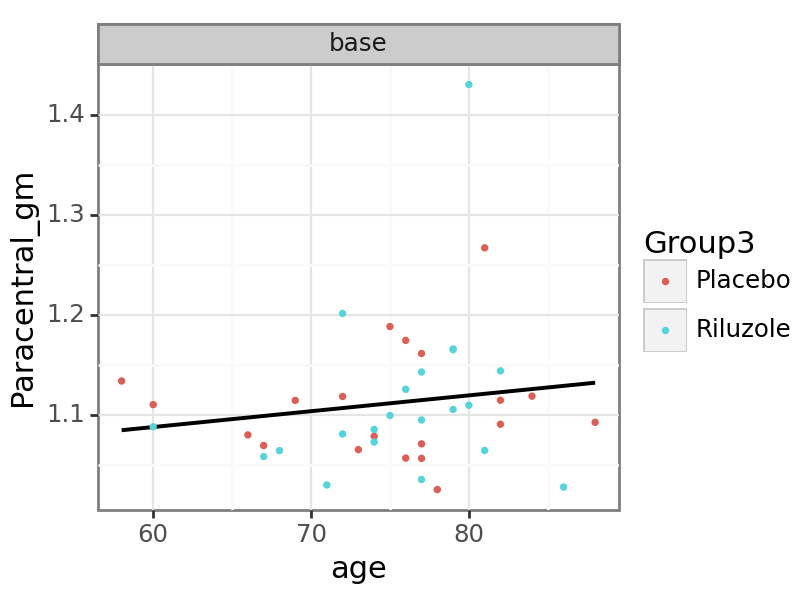

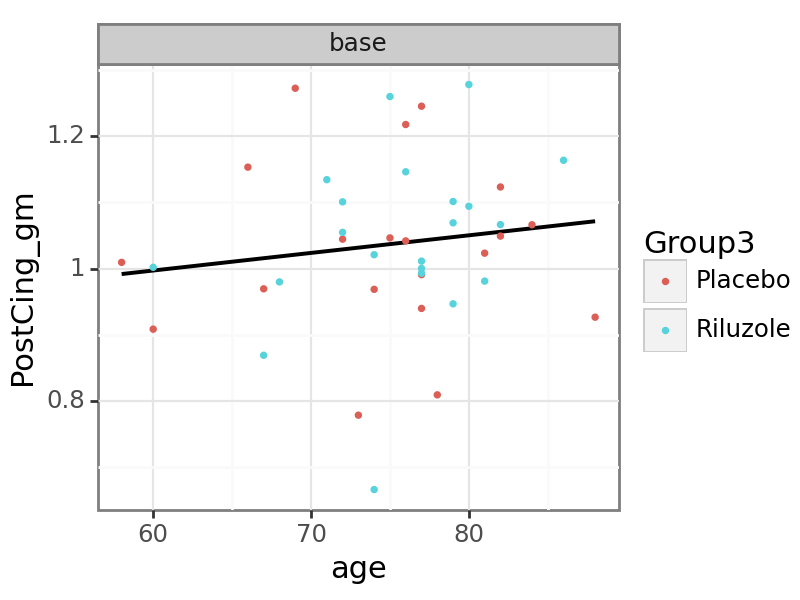

In [12]:
p9.options.figure_size = (4,3)
for var in [ele for ele in FDG_columns if ele in new_ras_rr.columns]:
    subset_data = new_ras_rr.dropna(subset = [var,'age', 'Group3'])
    subset_pons_rr = subset_data.copy()
    subset_pons_rr = subset_pons_rr.groupby('source', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 6)

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var, color = 'Group3'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_pons_rr, size = 0.8, se = False, color = 'black', method = 'lm')
            + p9.geom_point(size = 0.5)
            + p9.facet_grid('~timepoint')
    )
    print(plot)

# Selection of covariates
older = higher FDG (b/c young onset AD is more severe)  
more education = higher FDG (b/c of protective effects)  

## univariate

In [13]:
other_relationship_results = pd.DataFrame(columns = ['fdg_source', 'var1', 'var2', 'lin_p_baseline'])

#### composite_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in composite_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  composite_rr[composite_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['composite_rr', var0, var1, lin_p_baseline] 

#### pons_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in pons_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  pons_rr[pons_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['pons_rr', var0, var1, lin_p_baseline] 

#### pons_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in para_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  para_rr[para_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['para_rr', var0, var1, lin_p_baseline] 

#### new_para_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in new_para_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  new_para_rr[new_para_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['new_para_rr', var0, var1, lin_p_baseline] 

#### new_ras_rr ####
combinations = pd.DataFrame(list(itertools.product([ele for ele in FDG_columns if ele in new_ras_rr.columns], ['age', 'apoe4_carrier', 'sex', 'race', 'Education_years'])))
for idx in range(combinations[0].size):
    var0 = combinations[0][idx]
    var1 = combinations[1][idx]
    temp_df_baseline =  new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = [var0, var1])

    # z-score data
    temp_df_baseline[[var0]] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[var0]])

    # univariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var0 + ' ~ ' + var1, data = temp_df_baseline).fit()
    lin_p_baseline = model.pvalues[1:].min()

    
    # save results
    other_relationship_results.loc[len(other_relationship_results)] =  ['new_ras_rr', var0, var1, lin_p_baseline] 

In [14]:
other_relationship_results.groupby(['fdg_source', 'var2'])[['lin_p_baseline']].apply(lambda x: (x<0.05).sum()).reset_index().pivot(index='fdg_source', columns='var2', values='lin_p_baseline')


var2          Education_years  age  apoe4_carrier  race  sex
fdg_source                                                  
composite_rr                7    4              0     1    1
new_para_rr                 2    2              0     1    1
new_ras_rr                  1    3              0     0    1
para_rr                     0    1              0     0    1
pons_rr                     0    1              2     0    3

## combined

In [15]:
other_relationship_results_multi = pd.DataFrame(columns = ['fdg_source', 'var',
    'age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline', 'race_hisp_baseline', 'race_white_baseline'
])

race_hisp_baseline = np.nan 

#### composite_rr ####
for var in [ele for ele in FDG_columns if ele in composite_rr.columns]:
    temp_df_baseline =  composite_rr[composite_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race',
     'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    #race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['composite_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### pons_rr ####
for var in [ele for ele in FDG_columns if ele in pons_rr.columns]:
    temp_df_baseline =  pons_rr[pons_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    #race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['pons_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### para_rr ####
for var in [ele for ele in FDG_columns if ele in para_rr.columns]:
    temp_df_baseline =  para_rr[para_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    #race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['para_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### new_para_rr ####
for var in [ele for ele in FDG_columns if ele in new_para_rr.columns]:
    temp_df_baseline =  new_para_rr[new_para_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race', 
    'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    #race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['new_para_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

#### new_ras_rr ####
for var in [ele for ele in FDG_columns if ele in new_ras_rr.columns]:
    temp_df_baseline =  new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = [var, 'age', 'apoe4_carrier', 'sex', 'race',
     'Education_years'])

    # z-score data
    temp_df_baseline[[var, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df_baseline[[
        var, 'Education_years', 'age']])

    # multivariate linear model just within the baseline datapoints of the trial data
    model = smf.ols(formula = var + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df_baseline).fit()
    age_baseline = model.pvalues['age']
    apoe4_carrier_baseline = model.pvalues['apoe4_carrier[T.Yes]']
    sex_baseline = model.pvalues['sex[T.M]']
    Education_years_baseline = model.pvalues['Education_years']
    #race_hisp_baseline = model.pvalues['race[T.Hispanic/Latino]']
    race_white_baseline = model.pvalues['race[T.White/NH]']

    # save results
    other_relationship_results_multi.loc[len(other_relationship_results_multi)] =  ['new_ras_rr', var,
    age_baseline,apoe4_carrier_baseline,sex_baseline, Education_years_baseline, race_hisp_baseline, race_white_baseline
   ] 

In [16]:
(other_relationship_results_multi[['age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline','race_hisp_baseline', 'race_white_baseline'
]]<0.05).sum().sort_values()

race_hisp_baseline           0
race_white_baseline          0
apoe4_carrier_baseline       1
sex_baseline                 3
age_baseline                 9
Education_years_baseline    13
dtype: int64

In [17]:
other_relationship_results_multi.groupby('fdg_source')[['age_baseline','apoe4_carrier_baseline','sex_baseline', 'Education_years_baseline', 'race_hisp_baseline', 'race_white_baseline'
]].apply(lambda x: (x<0.05).sum()).reset_index()


fdg_source  age_baseline  apoe4_carrier_baseline  sex_baseline  \
0  composite_rr             3                       0             0   
1   new_para_rr             2                       0             0   
2    new_ras_rr             3                       0             0   
3       para_rr             1                       0             1   
4       pons_rr             0                       1             2   

   Education_years_baseline  race_hisp_baseline  race_white_baseline  
0                         8                   0                    0  
1                         5                   0                    0  
2                         0                   0                    0  
3                         0                   0                    0  
4                         0                   0                    0

## age directionality



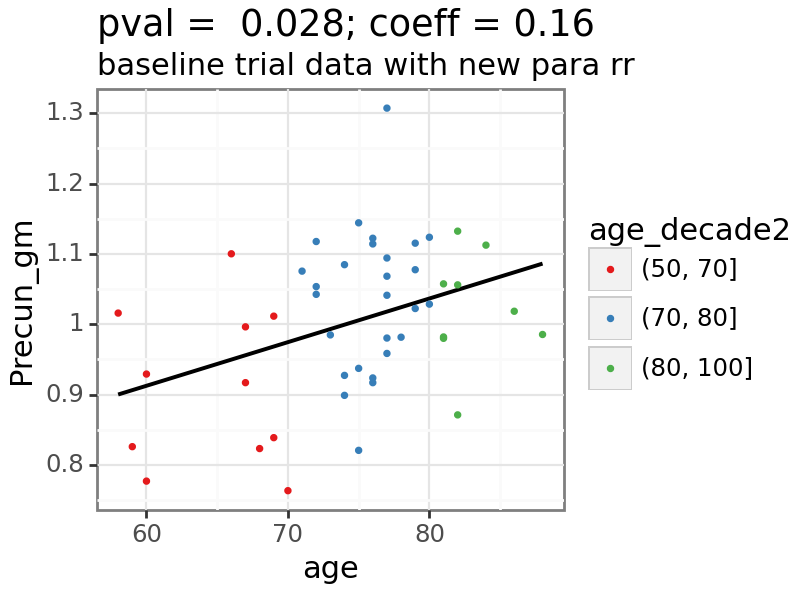

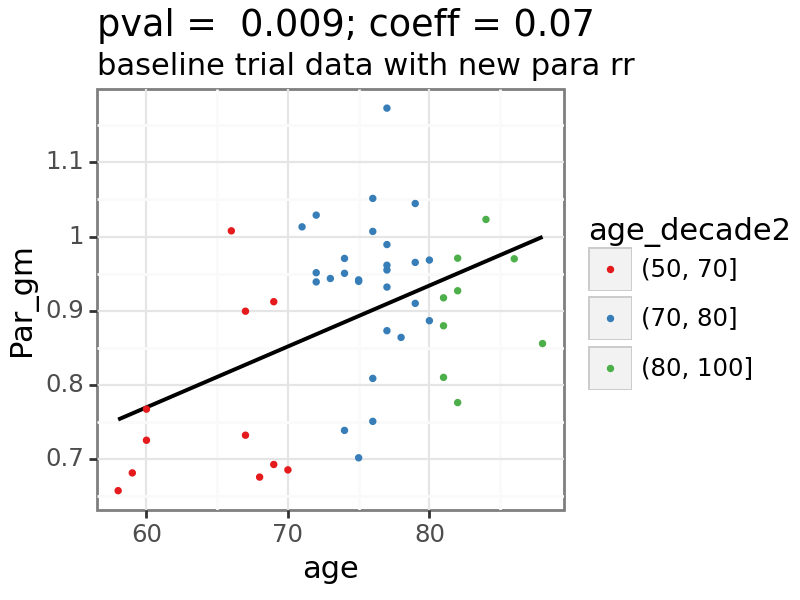

In [18]:
p9.options.figure_size = (4,3)   

var_list = other_relationship_results_multi.loc[other_relationship_results_multi['fdg_source'].isin(['new_para_rr']) & (other_relationship_results_multi['age_baseline']<0.05), 'var'].to_list()
for var1 in var_list:
    p_value = other_relationship_results_multi.loc[
        other_relationship_results_multi['var'].isin([var1]) & other_relationship_results_multi['fdg_source'].isin(['new_para_rr']),
         'age_baseline'].reset_index(drop=True)[0].round(3).astype('str')

    subset_data = new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = ['age', var1])
    subset_data2 = subset_data.copy()
    subset_data2 = subset_data2.groupby('age_decade2', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 10)

    # multivariate linear model just within the baseline datapoints of the trial data
    temp_df = subset_data.copy()
    temp_df[[var1, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df[[
        var1, 'Education_years', 'age']])    # z-score data        
    model = smf.ols(formula = var1 + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df).fit()
    coeff = model.params['Education_years'].round(2).astype('str')


    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'age', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value + '; coeff = ' +coeff), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )
    print(plot)

## education directionality

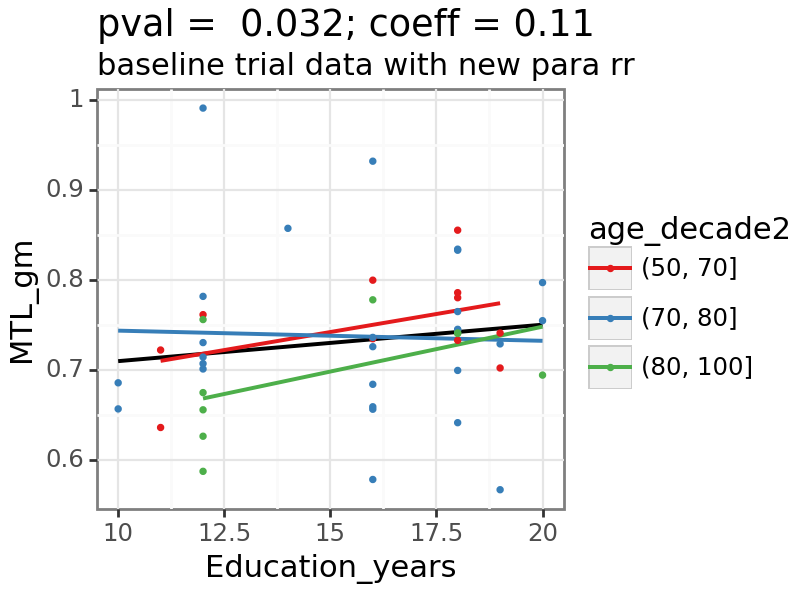

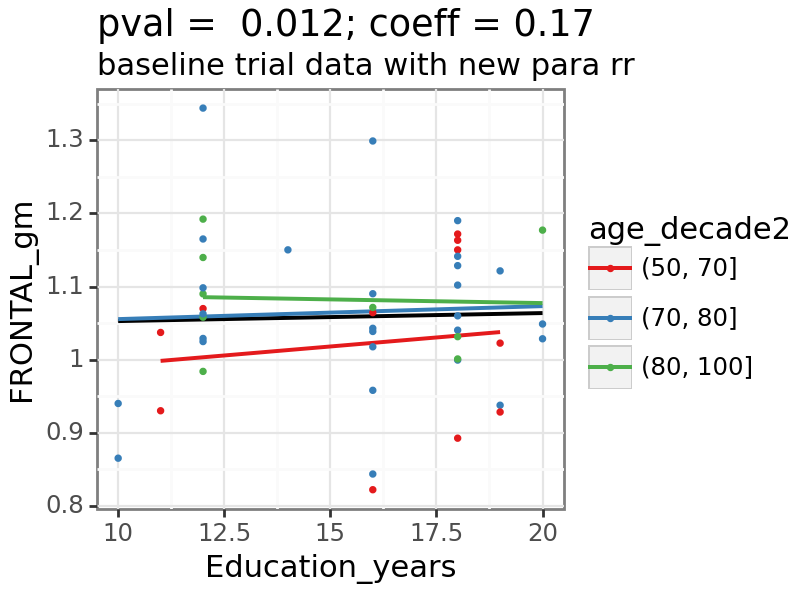

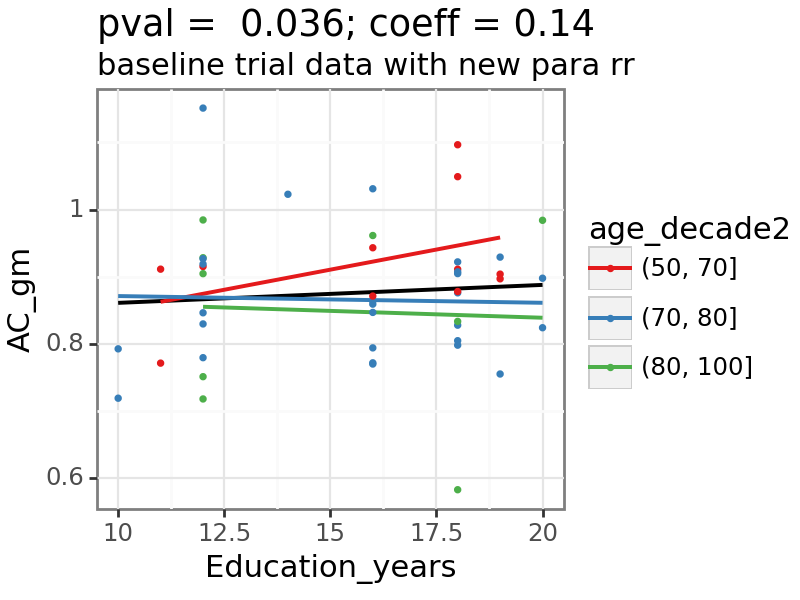

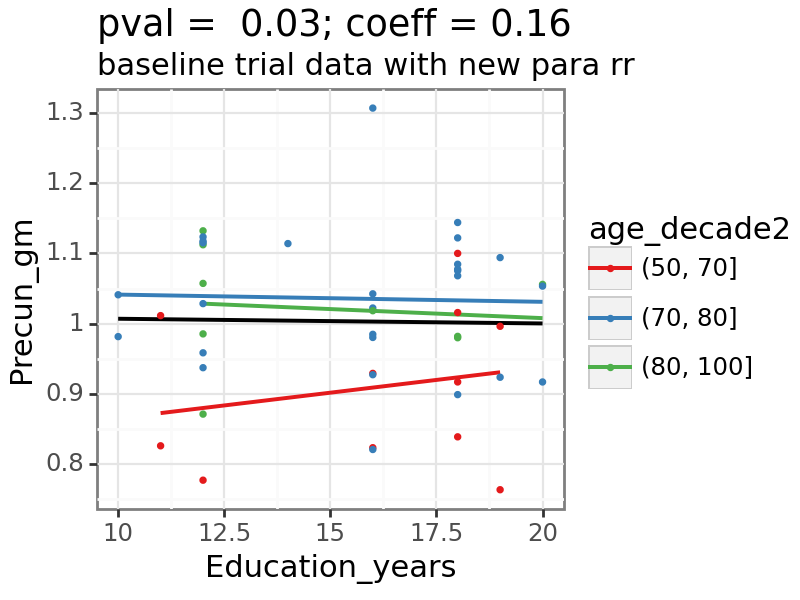

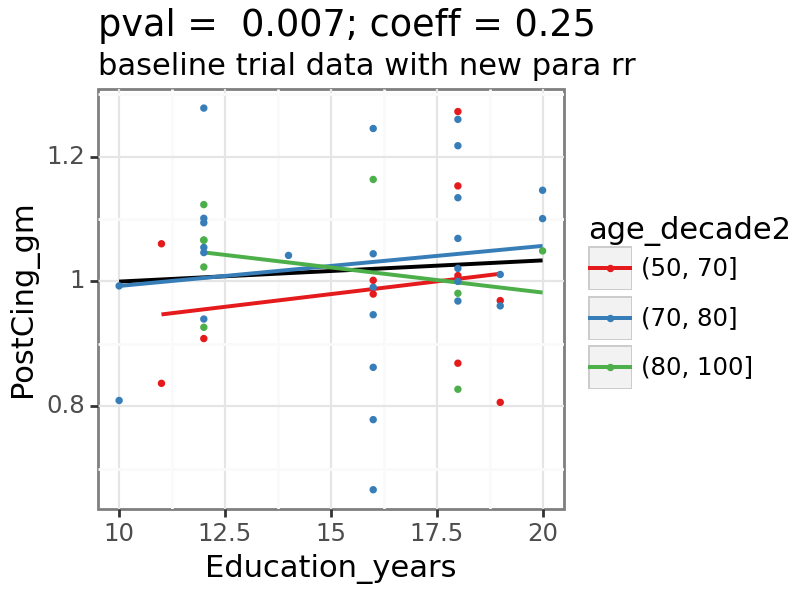

In [19]:
var_list = other_relationship_results_multi.loc[other_relationship_results_multi['fdg_source'].isin(['new_para_rr']) & (other_relationship_results_multi['Education_years_baseline']<0.05), 'var'].to_list()
for var1 in var_list:
    p_value = other_relationship_results_multi.loc[
        other_relationship_results_multi['var'].isin([var1]) & other_relationship_results_multi['fdg_source'].isin(['new_para_rr']),
         'Education_years_baseline'].reset_index(drop=True)[0].round(3).astype('str')

    subset_data = new_ras_rr[new_ras_rr['timepoint'].isin(['base'])].dropna(subset = ['Education_years', var1])
    subset_data2 = subset_data.copy()
    subset_data2 = subset_data2.groupby('age_decade2', observed=True).filter(lambda x: x['ID_ADM'].nunique()> 10)


    # multivariate linear model just within the baseline datapoints of the trial data
    temp_df = subset_data.copy()
    temp_df[[var1, 'Education_years', 'age']] = preprocessing.StandardScaler().fit_transform(temp_df[[
        var1, 'Education_years', 'age']])    # z-score data        
    model = smf.ols(formula = var1 + ' ~ age + apoe4_carrier + sex + Education_years + race', data = temp_df).fit()
    coeff = model.params['Education_years'].round(2).astype('str')

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value + '; coeff = ' +coeff ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    plot = (
            p9.ggplot(subset_data, p9.aes(x = 'Education_years', y = var1, color = 'age_decade2'))
            + p9.theme_bw(base_size = 11)
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, color = 'black', method = 'lm')
            + p9.geom_smooth(subset_data, size = 0.8, se = False, alpha = 1, method = 'lm')
            #+ p9.geom_smooth(subset_data2, size = 0.8, se = False, alpha = 1)
            
            + p9.geom_point(size = 0.5)
            + p9.labs(title = ('pval =  ' + p_value + '; coeff = ' +coeff ), subtitle = 'baseline trial data with new para rr')
            + p9.scale_color_brewer(type='qual', palette='Set1')
        )

    print(plot)